<a href="https://colab.research.google.com/github/Coder731/machine-learning-project/blob/main/SLF_Project_LearnerNotebook_LowCode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext nb_black

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
from string import Template
import pprint

data = pd.read_csv("used_device_data.csv")
print(
    '\n___________________1\n',
    'data.head(2):\n',
    data.head(2),
    '\n___________________2\n',
    'data.shape:\n',
    data.shape,
    '\n___________________3\n',
    'data.info():\n',
    data.info(),
    '\n___________________4\n',
    'data.describe().T:\n',
    data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [2]:
data.dropna()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3447      Apple      iOS        15.27  yes   no             8.0   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.0   213.0          2020   
2                  8.0       128.0  8.0   4200.0   213.0          2020   
3                  8.0        64.0  6.0   7250.0   480.0          2020   
4                  8.0        64.0  3.0   5000.0   185.0          2020   
...                ...         ...  ...      ...     ...           ...   
3447               7.0        64.0  4.0   3110.0   194.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127               4.307572              4.715100  
1           325               5.162097              5.519018  
2           162               5.111084              5.884631  
3           345               5.135387              5.630961  
4           293               4.389995              4.947837  
...         ...                    ...                   ...  
3447        208               5.100902              6.287933  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994  

[3253 rows x 15 columns]

<IPython.core.display.Javascript object>

### Duplicates

In [3]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [4]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

duplicates final answer:

In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [6]:
duplicates_list=data.duplicated()

<IPython.core.display.Javascript object>

In [7]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

15 columns in data set

just do first heading instance first:

checkpoint for 15 heading _ s run - DONE

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [9]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


<IPython.core.display.Javascript object>

### Checking for missing values

In [10]:
data.duplicated() ## Complete the code to check duplicate entries in the data

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [11]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Graphs

**`normalized_used_price`**

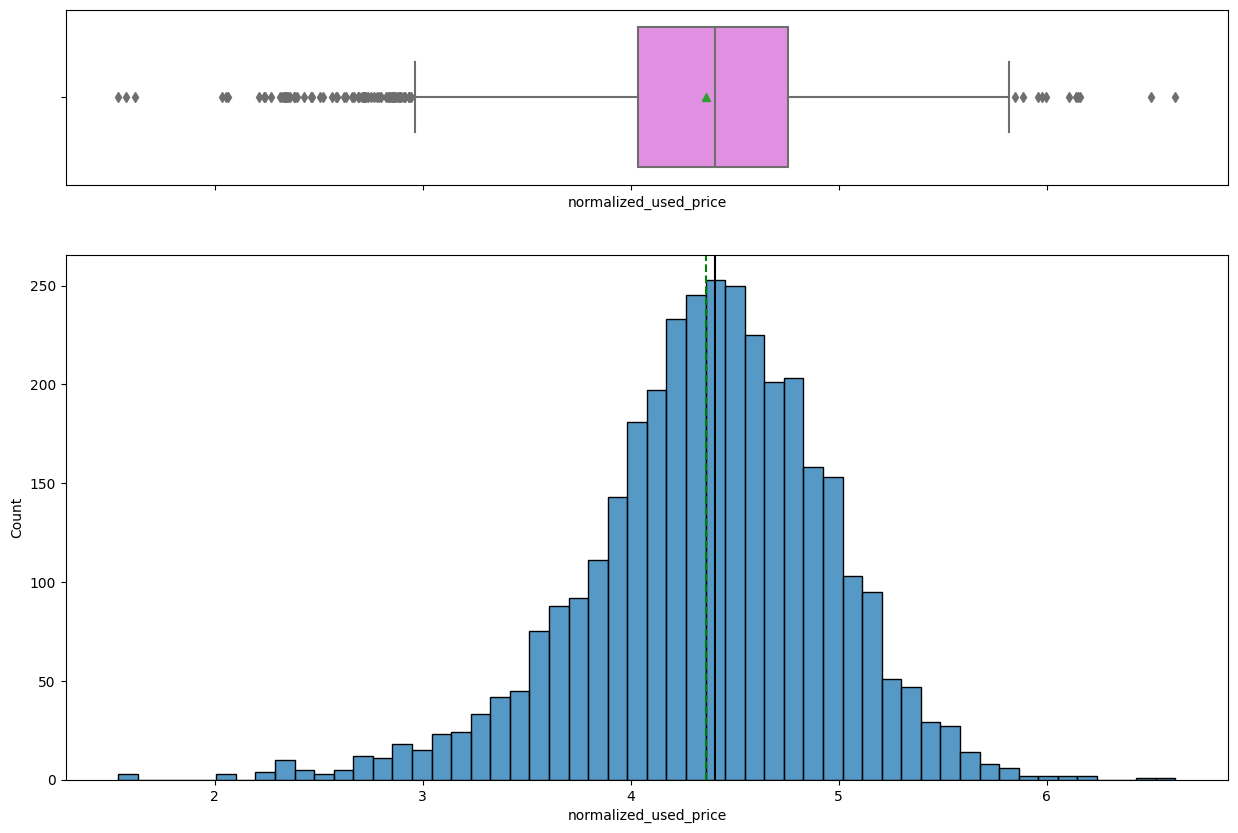

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "normalized_used_price")

**`normalized_new_price`**

checkpoint 2 27Jan2022 0122 h

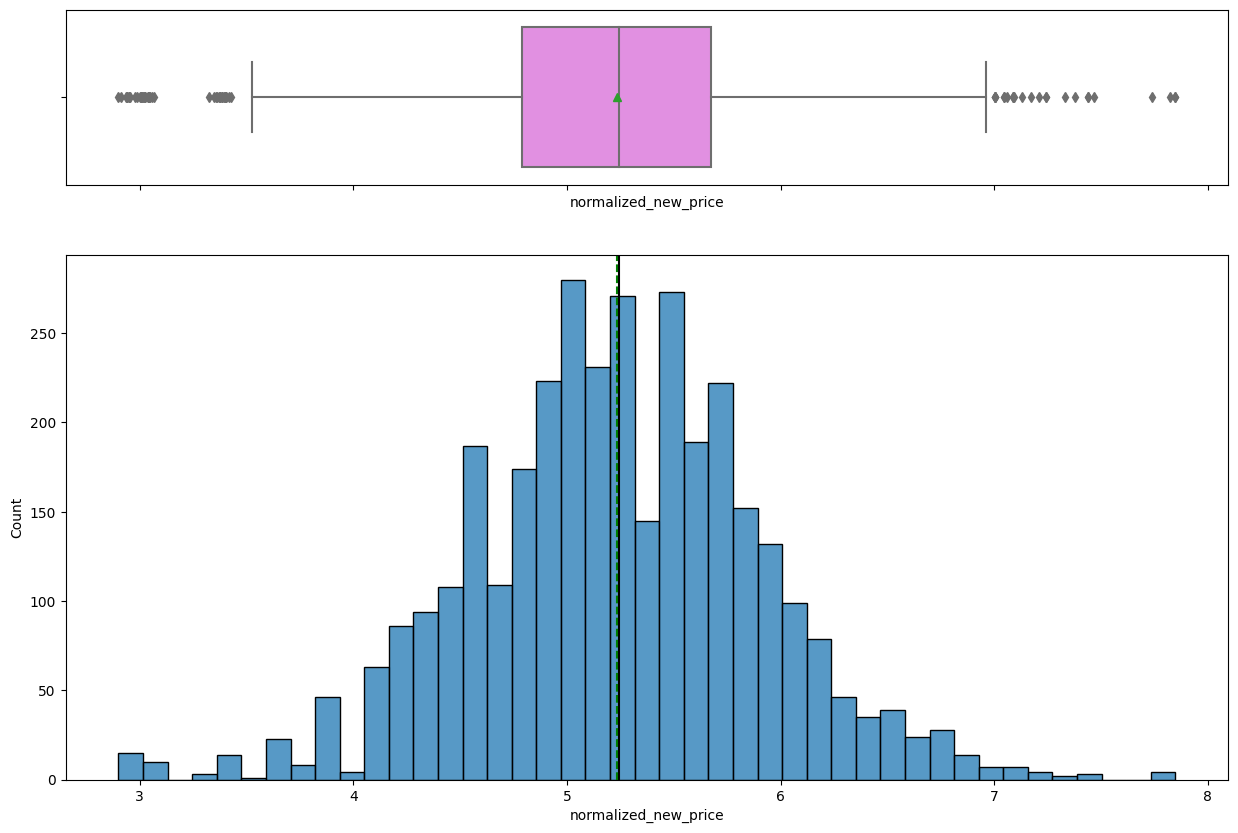

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, 'normalized_new_price')  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**`screen_size`**

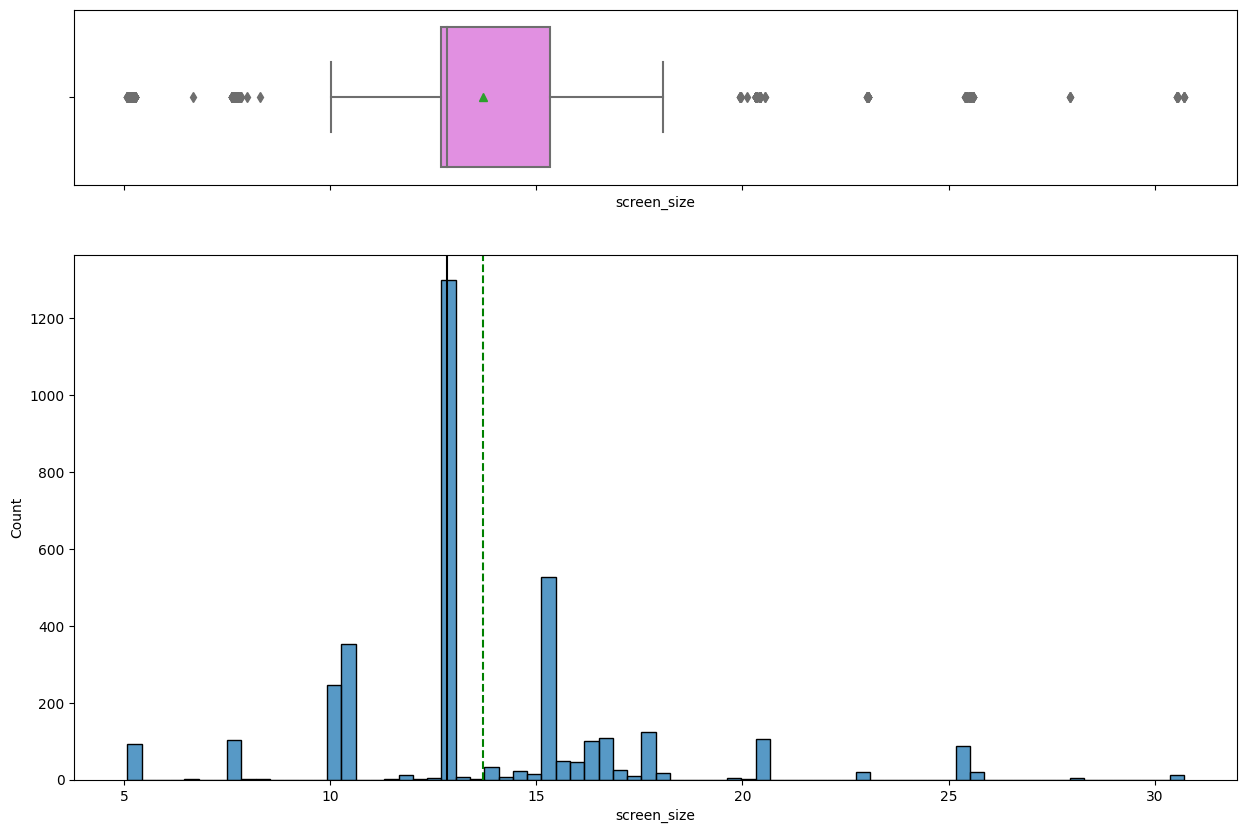

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, 'screen_size')  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

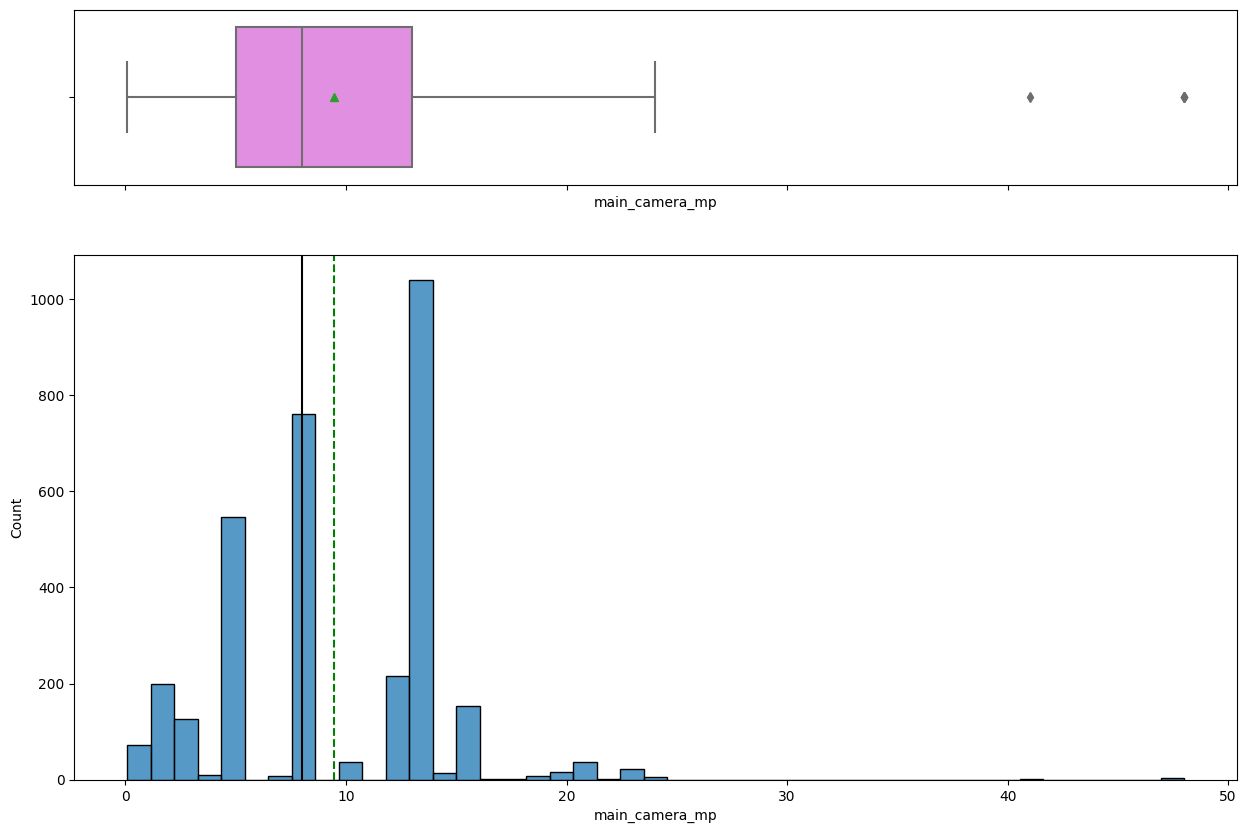

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, 'main_camera_mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

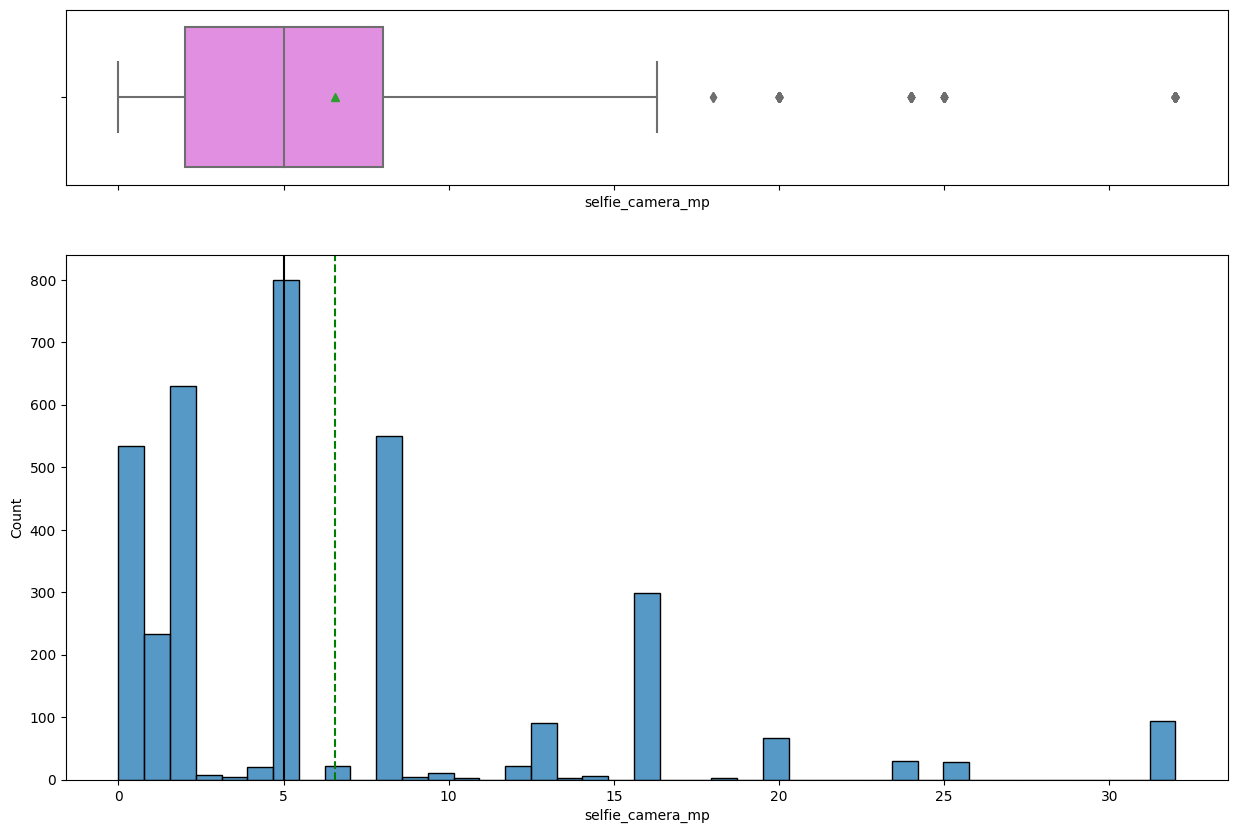

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, 'selfie_camera_mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

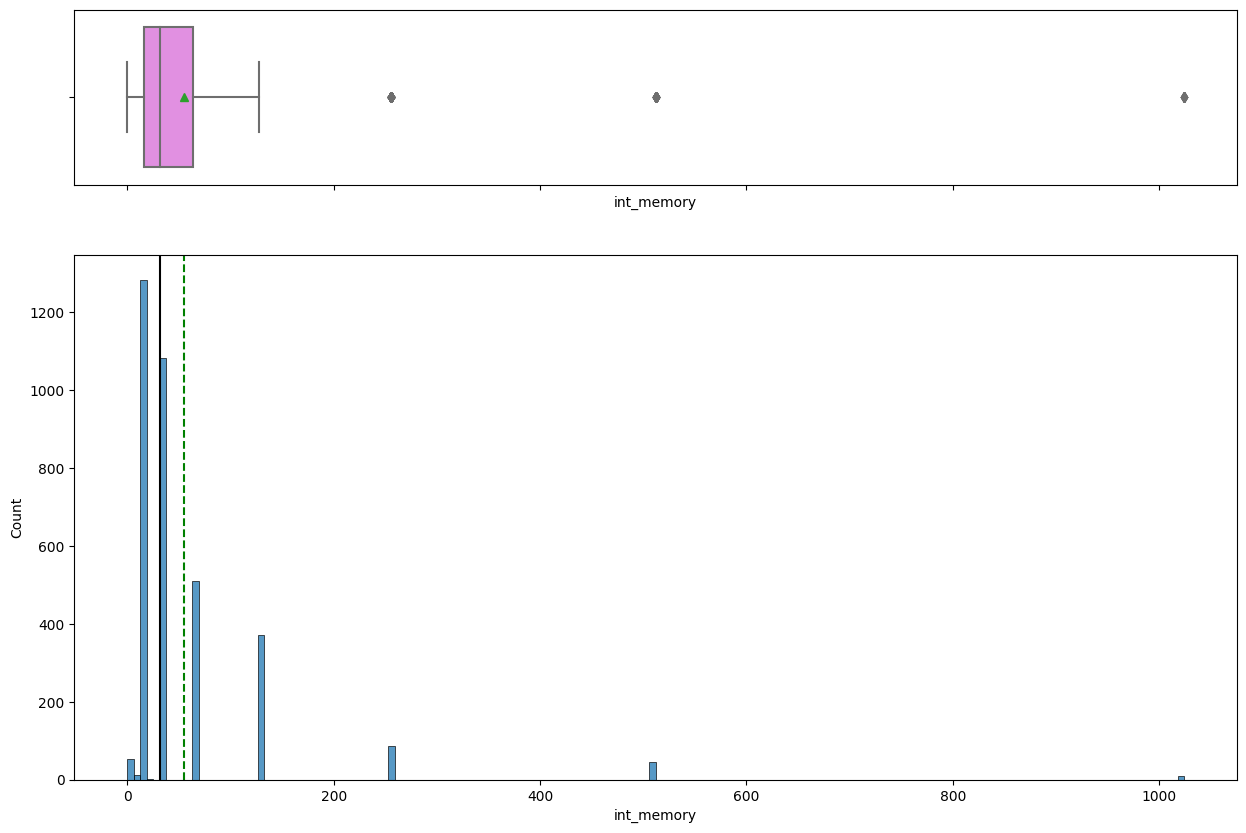

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, 'int_memory')  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

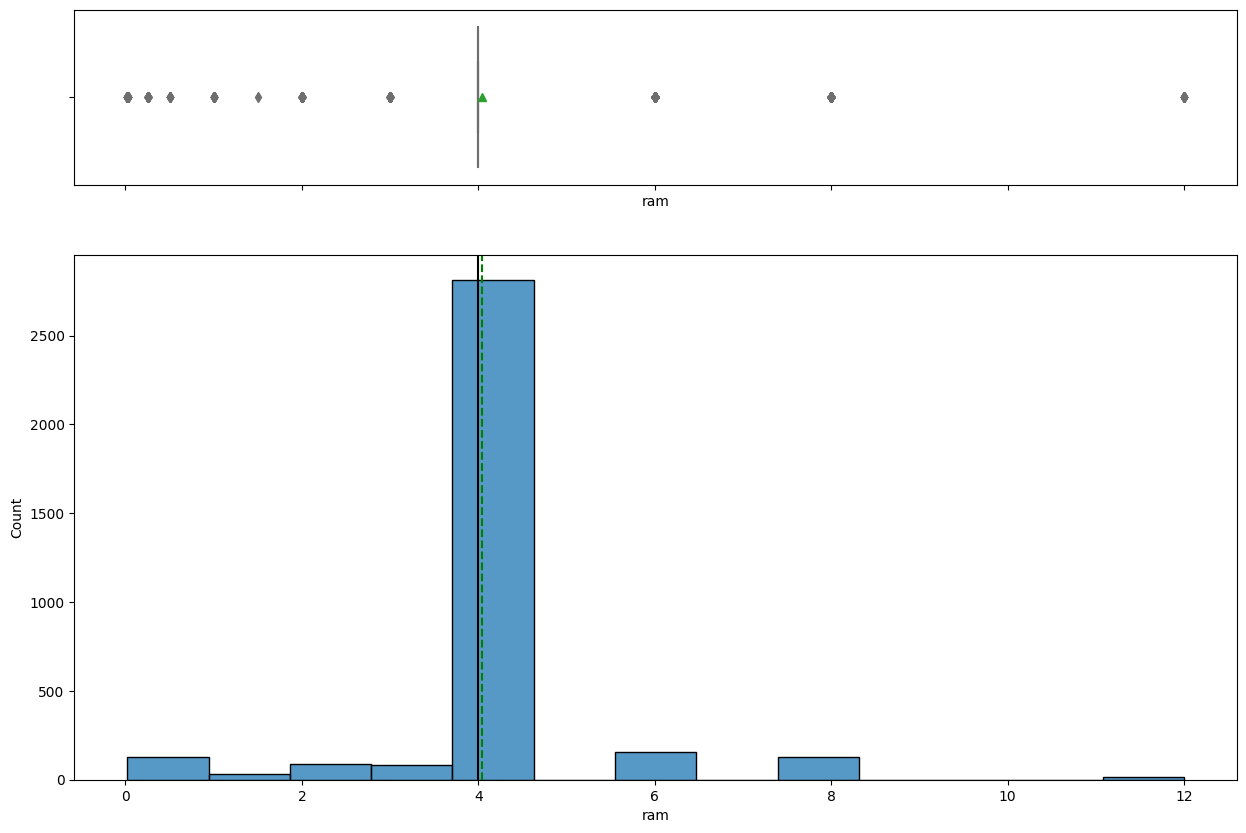

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, 'ram')  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

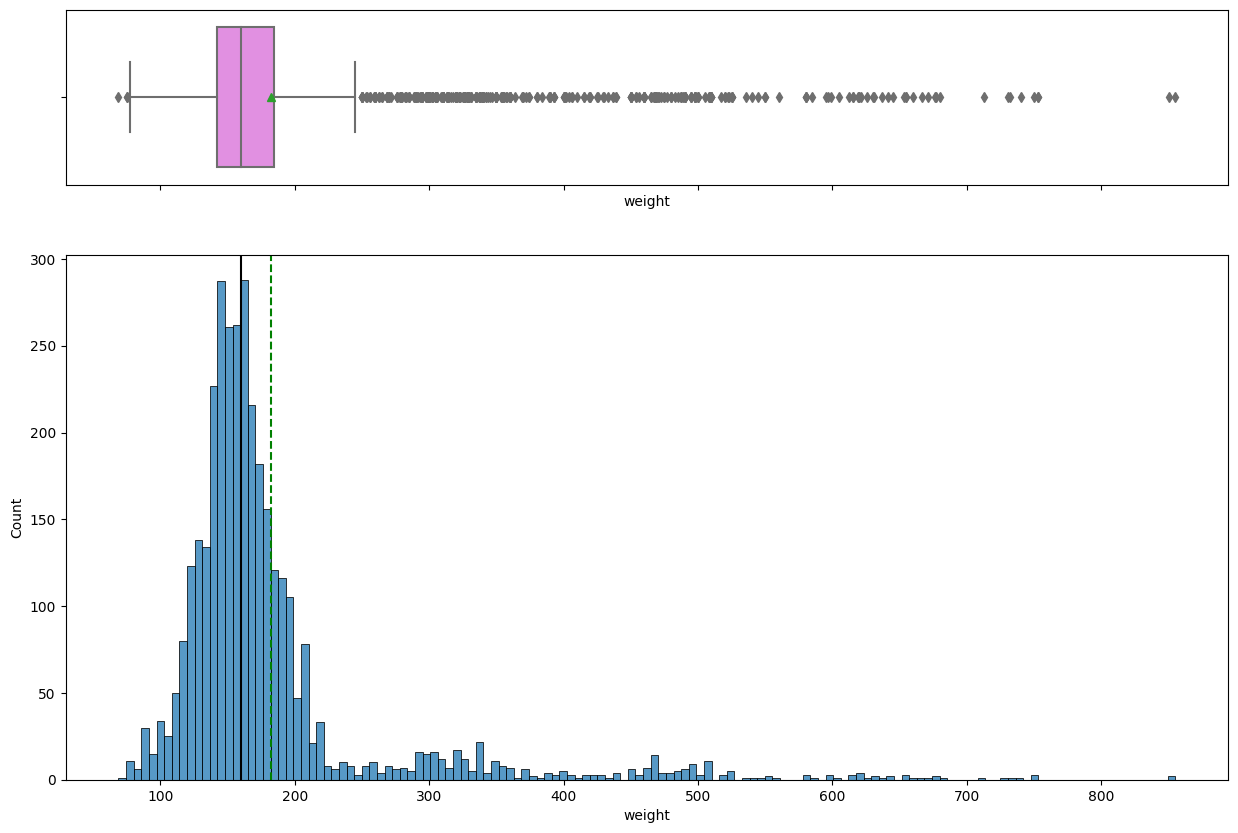

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, 'weight')  ## Complete the code to create histogram_boxplot for 'weight'

**`battery`**

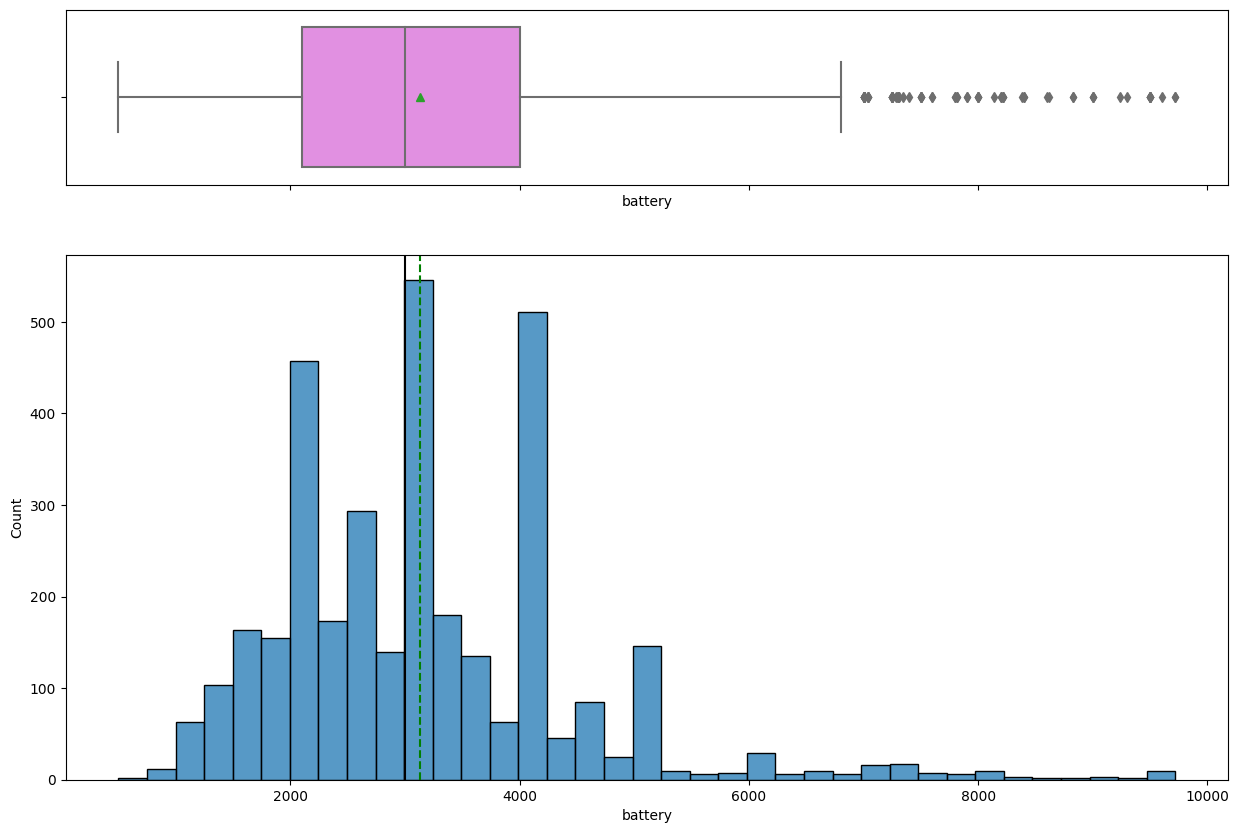

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, 'battery')  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

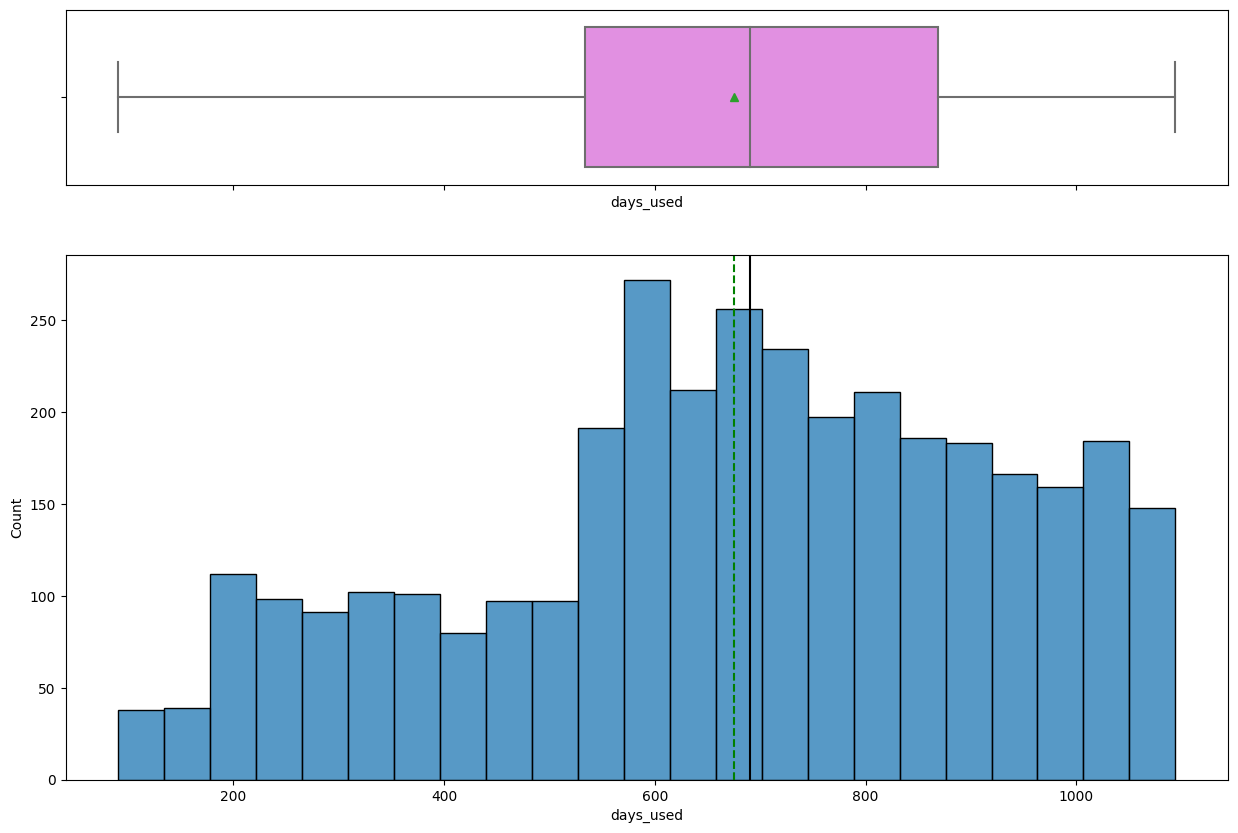

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, 'days_used')  ## Complete the code to create histogram_boxplot for 'days_used'

**`brand_name`**

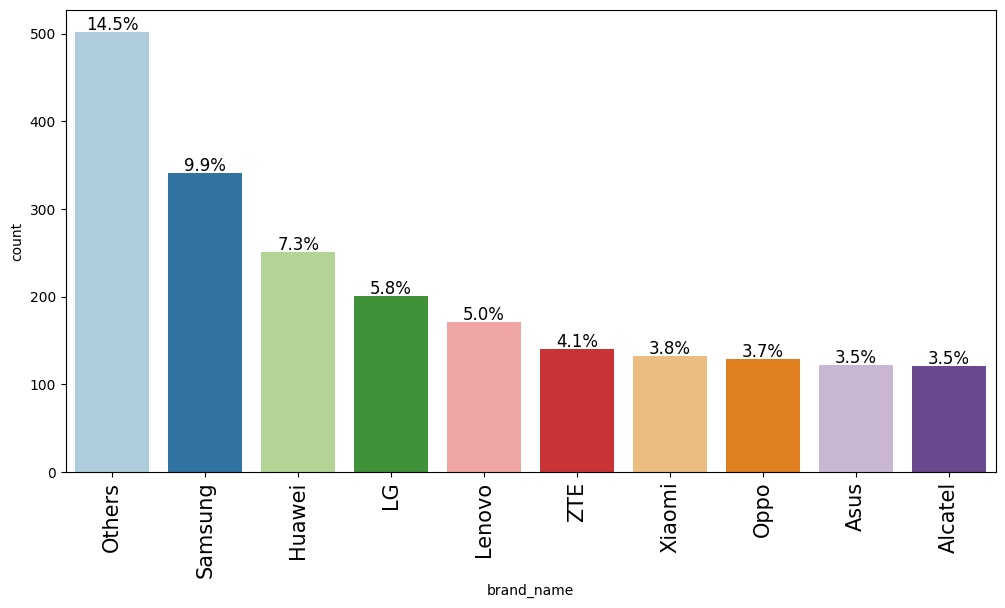

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

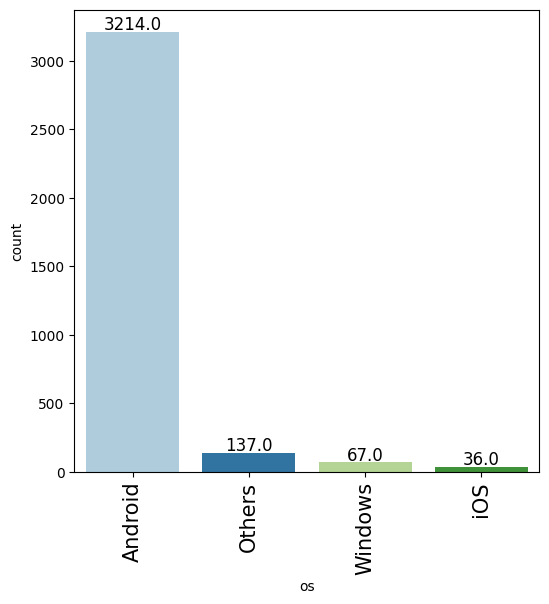

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, 'os') ## Complete the code to create labeled_barplot for 'os'

**`4g`**

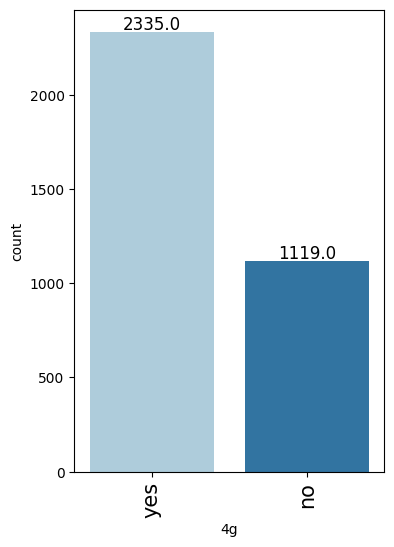

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, '4g') ## Complete the code to create labeled_barplot for '4g'

**`5g`**

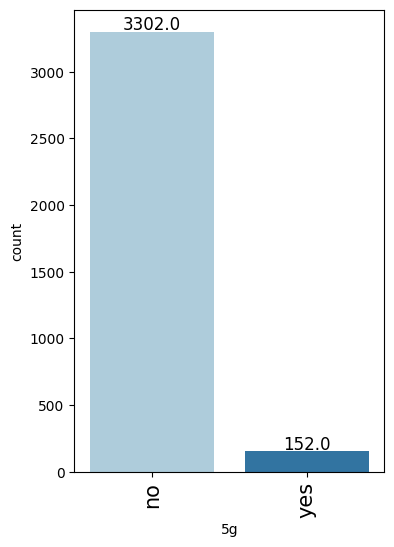

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df,'5g') ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

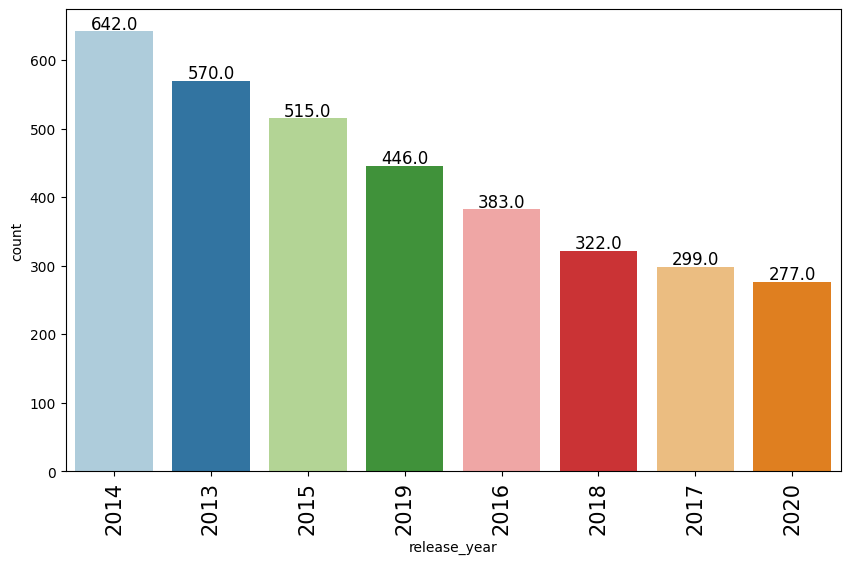

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, 'release_year') ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

**Correlation Check**

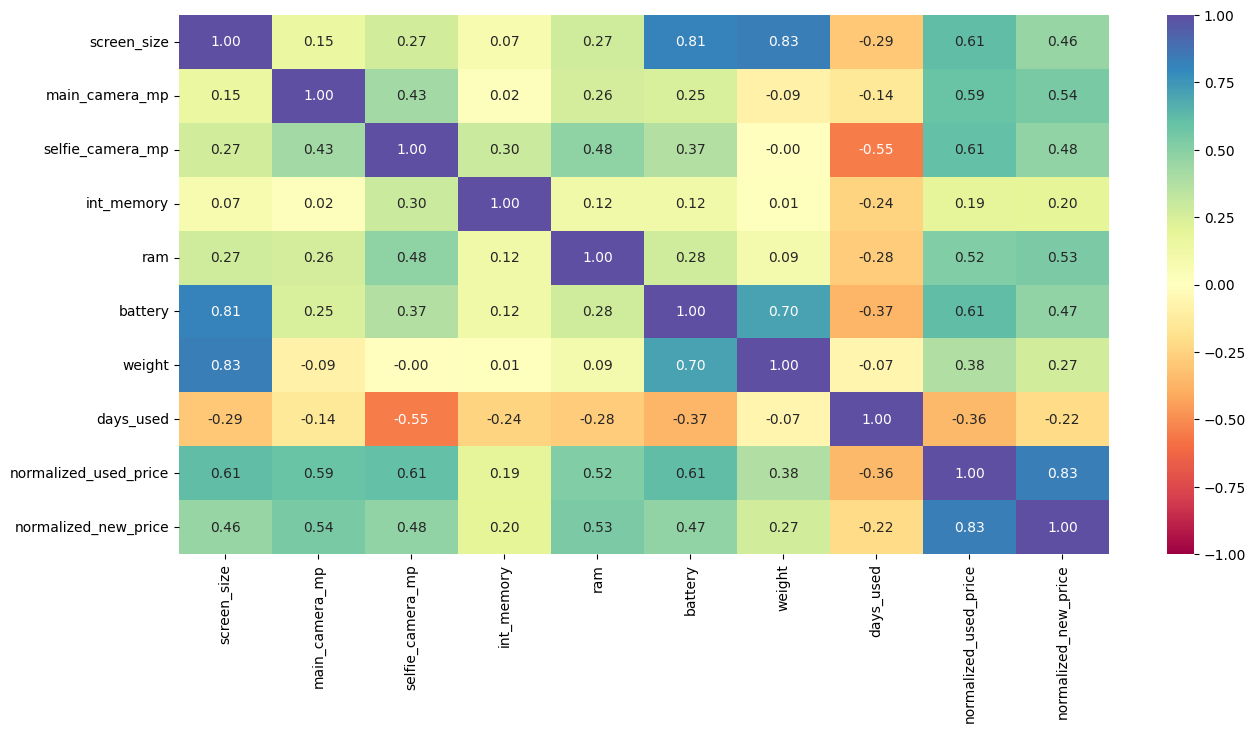

<IPython.core.display.Javascript object>

In [29]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

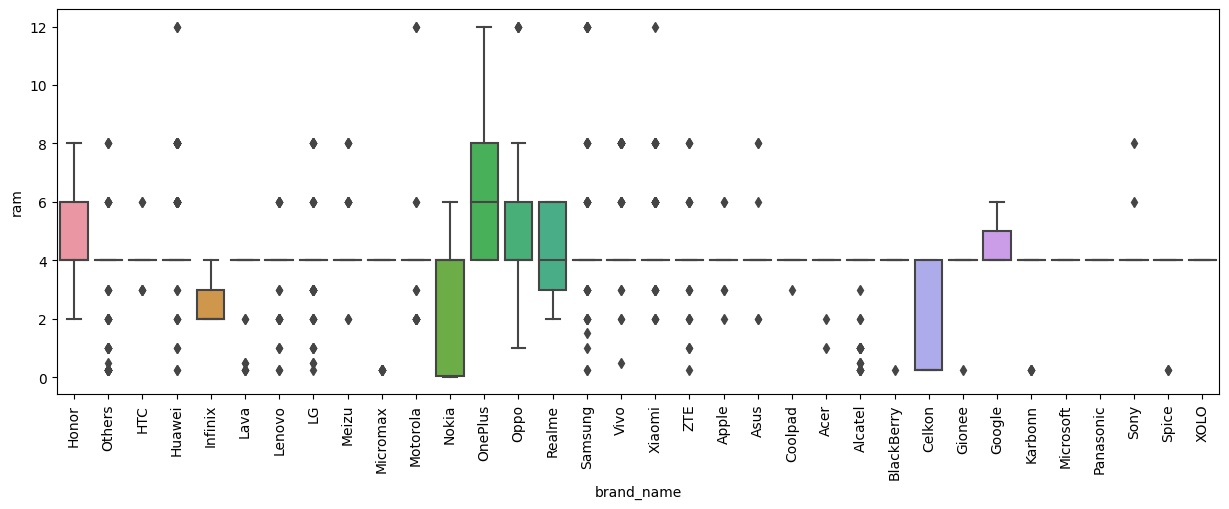

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [31]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

<IPython.core.display.Javascript object>

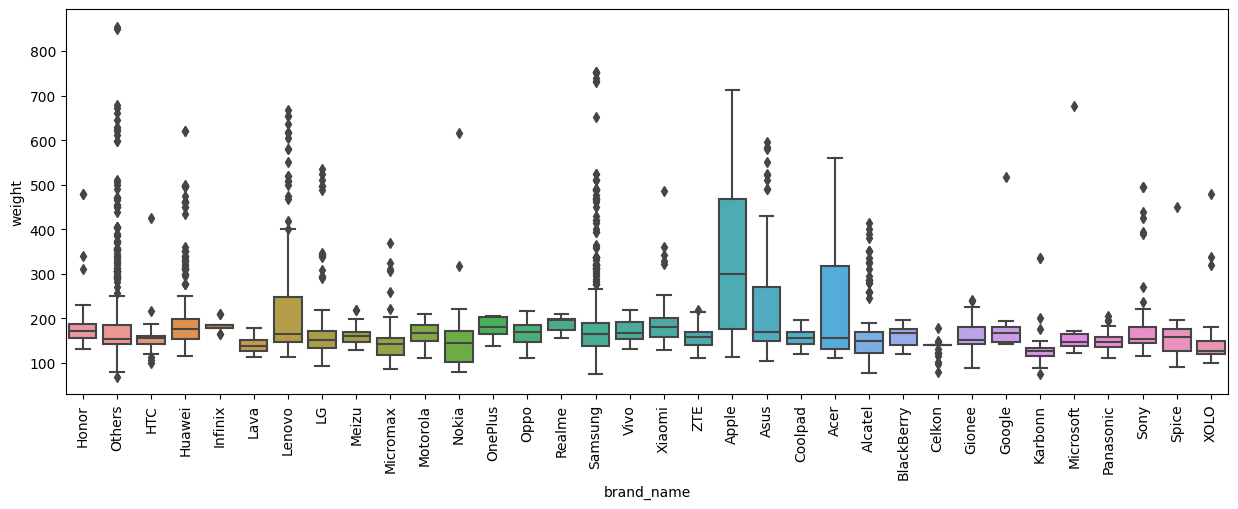

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='brand_name', y='weight', data=df) ## Complete the code to create a boxplot for 'brand_name' and 'weight' # https://builtin.com/data-science/boxplot
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [33]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

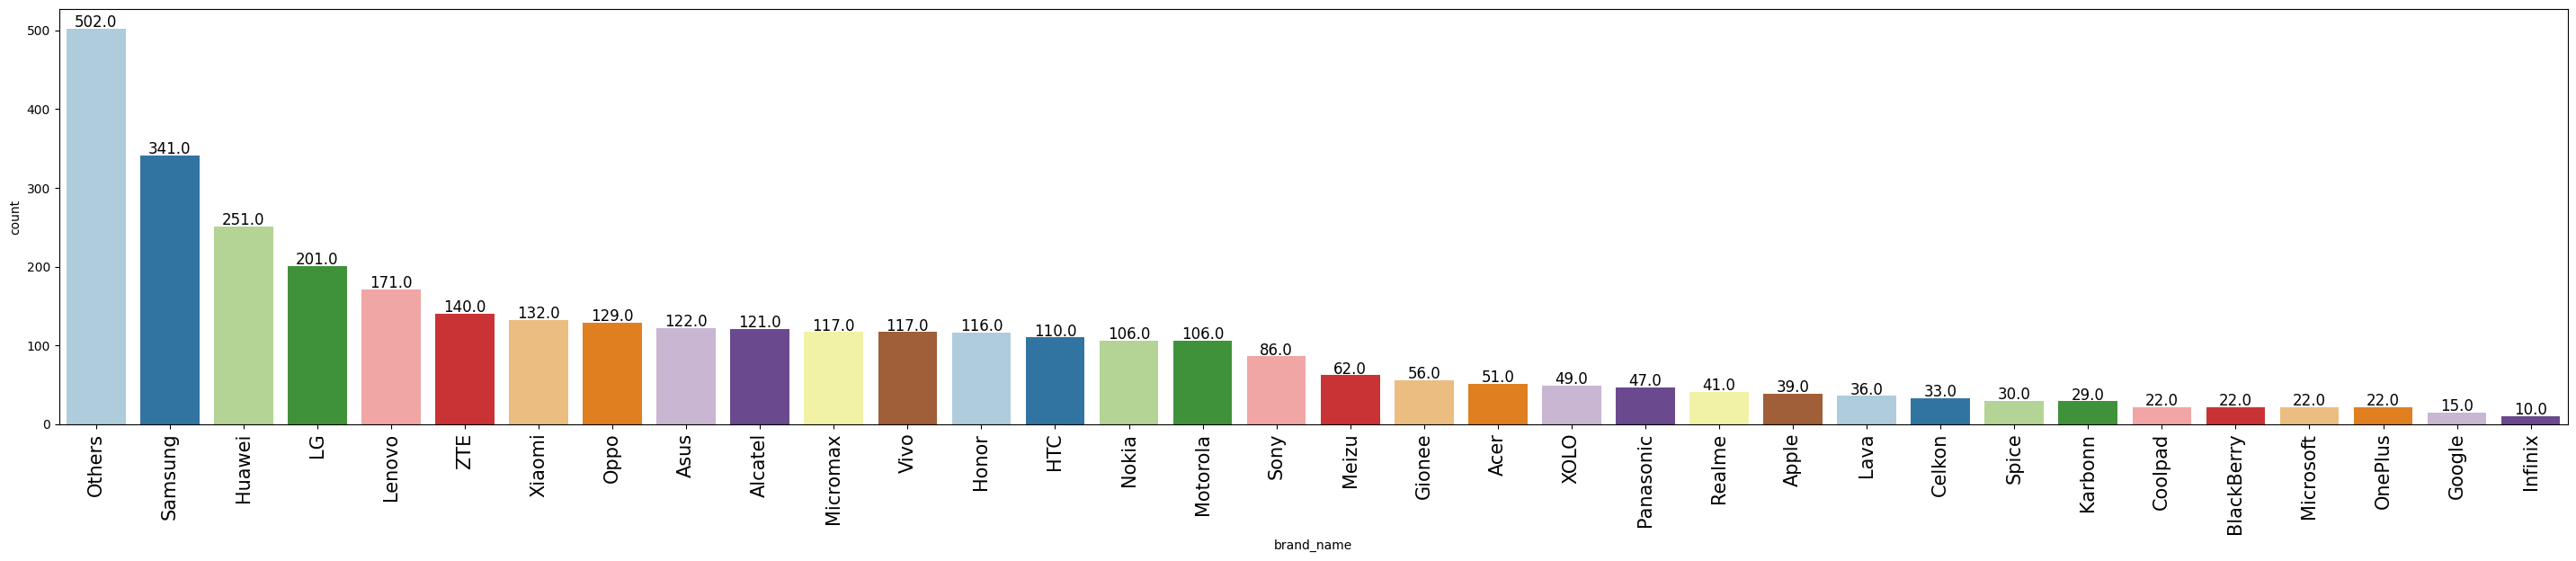

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [35]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

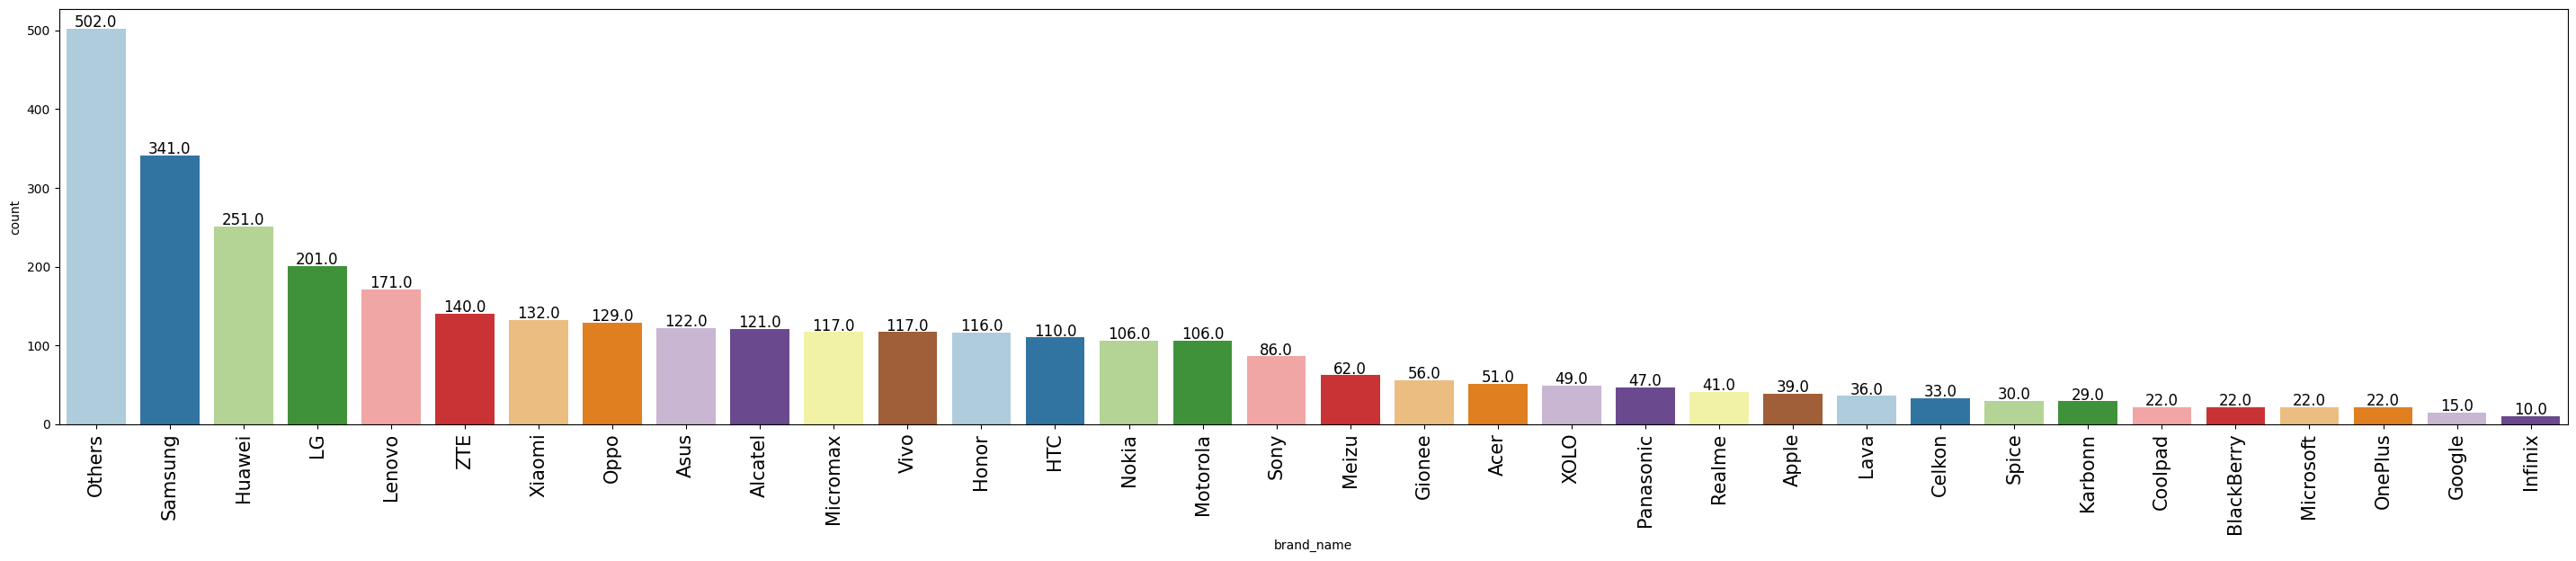

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [37]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

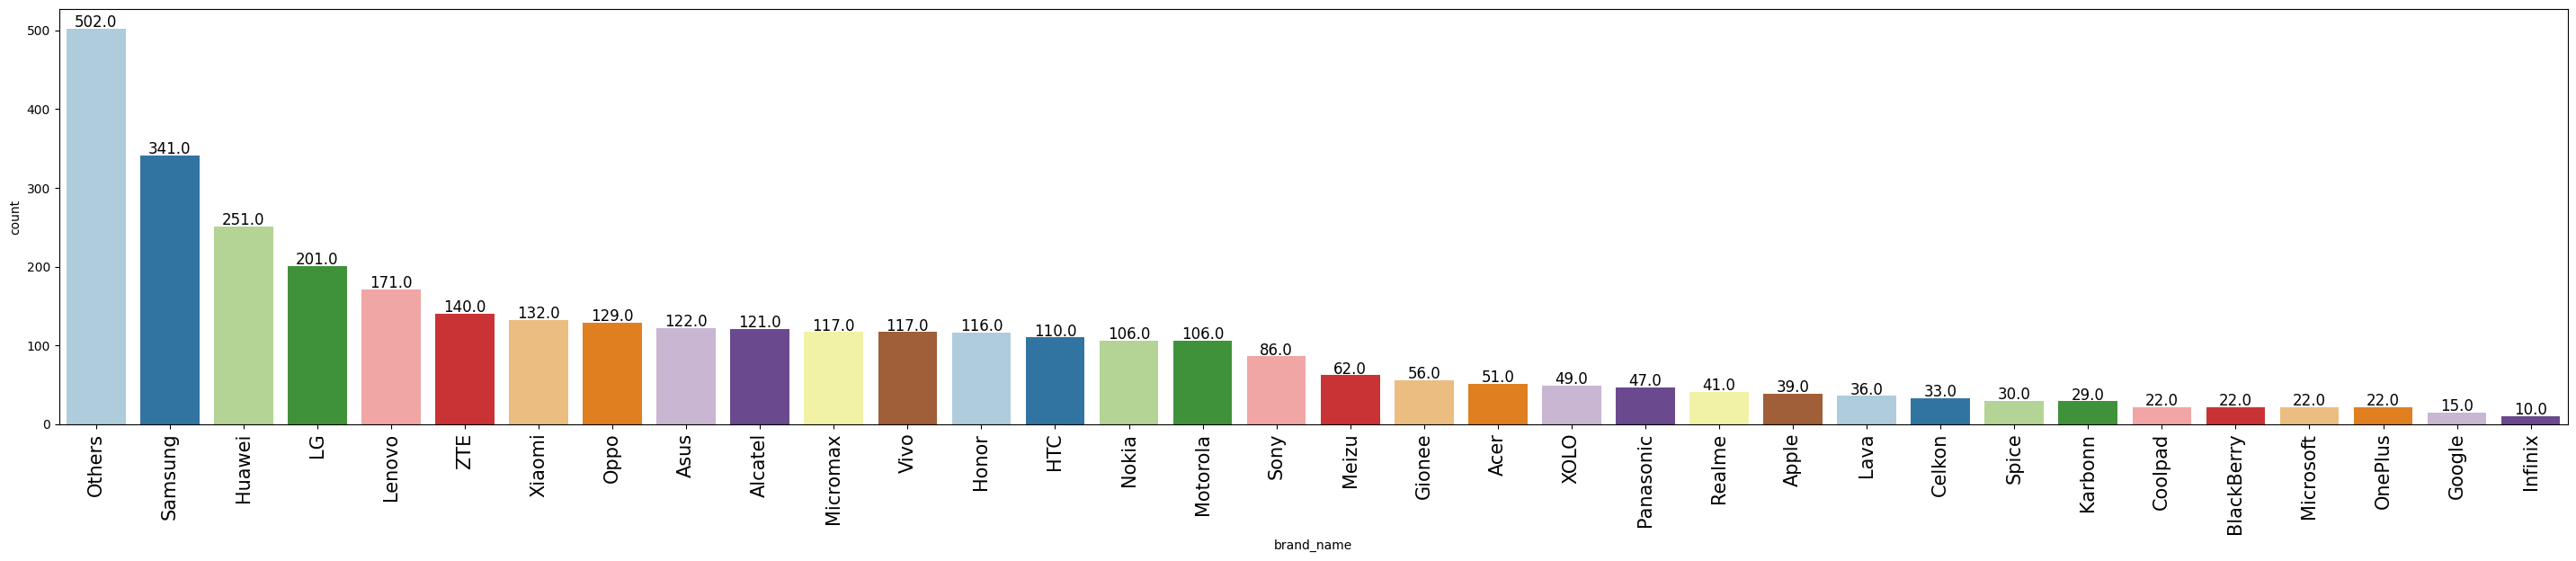

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df,'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

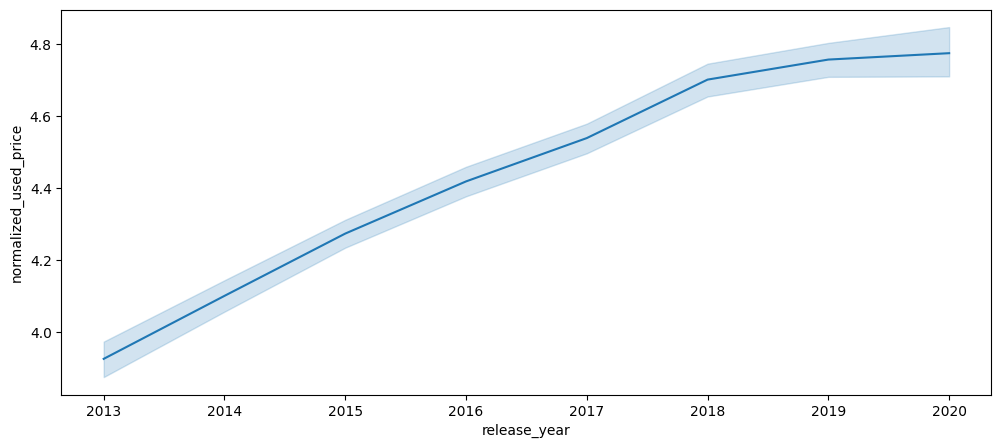

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price") ## Complete the code to create a lineplot for release year and used price # release_year normalized_used_price # https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

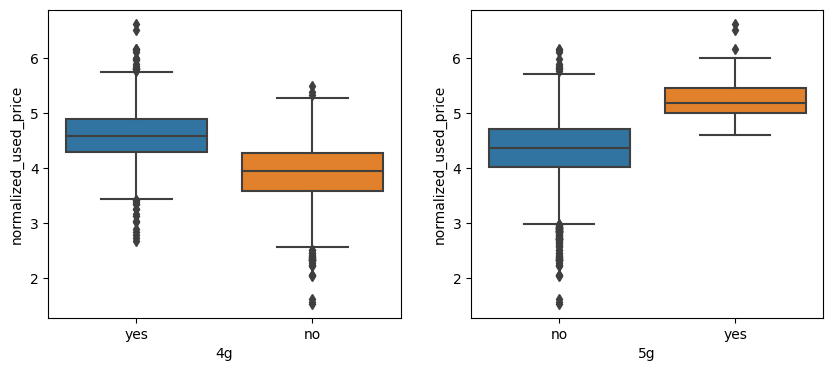

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [41]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [42]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [43]:
df1.isnull()

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False            True   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

In [44]:
# checking for missing values
df1.isna() ## Complete the code to check missing values in all the columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False            True   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

In [45]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [46]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["main_camera_mp"].transform("median")
)


<IPython.core.display.Javascript object>

In [47]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median") # https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False           False   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [48]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False           False   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [49]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median) ## Complete the code to impute the data with median

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False           False   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [50]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()
df1.head()

brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_used_price  \
0        64.0  3.0   3020.0   146.0        127               4.307572   
1       128.0  8.0   4300.0   213.0        325               5.162097   
2       128.0  8.0   4200.0   213.0        162               5.111084   
3        64.0  6.0   7250.0   480.0        345               5.135387   
4        64.0  3.0   5000.0   185.0        293               4.389995   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.630961                    1  
4              4.947837                    1

<IPython.core.display.Javascript object>

### Outlier Check



- Let's check for outliers in the data.

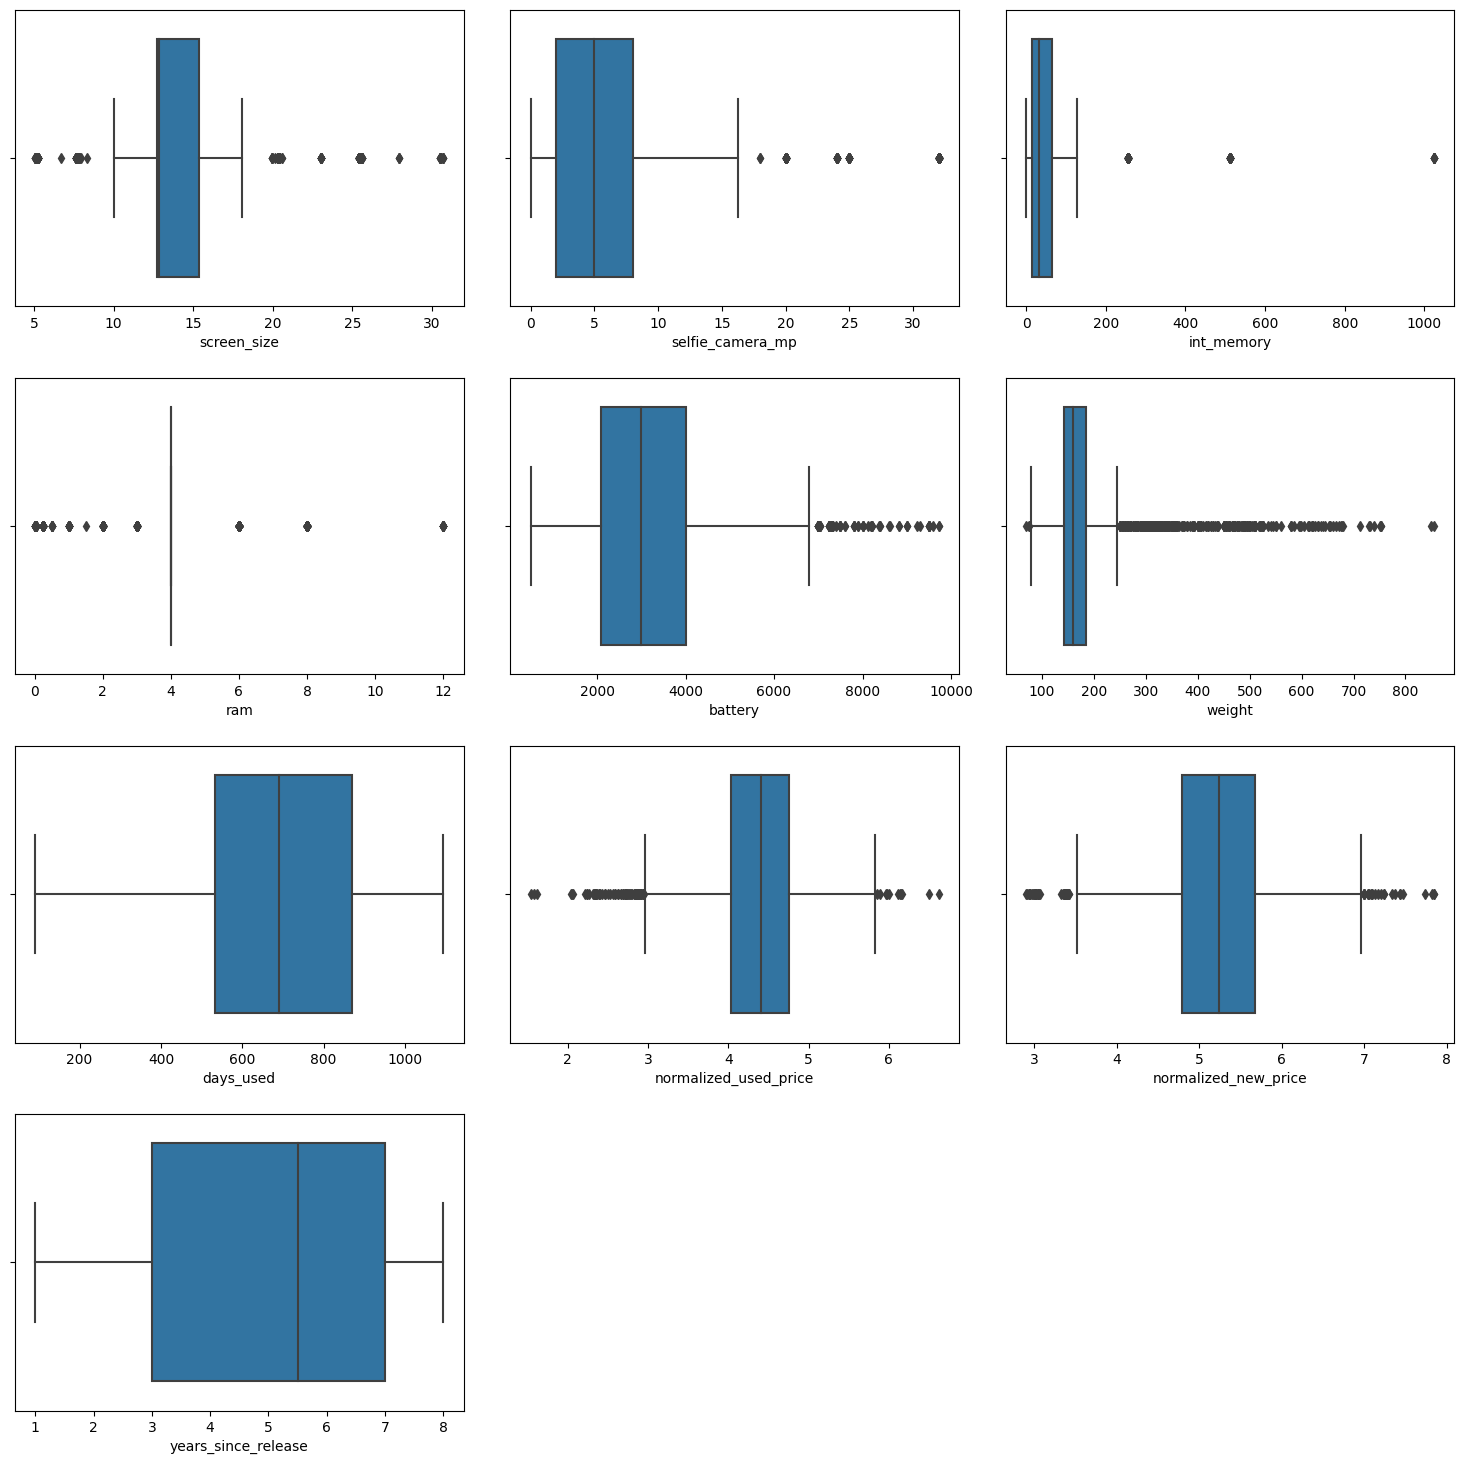

<IPython.core.display.Javascript object>

In [51]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [52]:
df1.head()

brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_used_price  \
0        64.0  3.0   3020.0   146.0        127               4.307572   
1       128.0  8.0   4300.0   213.0        325               5.162097   
2       128.0  8.0   4200.0   213.0        162               5.111084   
3        64.0  6.0   7250.0   480.0        345               5.135387   
4        64.0  3.0   5000.0   185.0        293               4.389995   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.630961                    1  
4              4.947837                    1

<IPython.core.display.Javascript object>

In [53]:
df1.drop(["brand_name", "os"], axis=1, inplace=True)
df1.head()

screen_size   4g   5g main_camera_mp  selfie_camera_mp  int_memory  ram  \
0        14.50  yes   no           13.0               5.0        64.0  3.0   
1        17.30  yes  yes           13.0              16.0       128.0  8.0   
2        16.69  yes  yes           13.0               8.0       128.0  8.0   
3        25.50  yes  yes           13.0               8.0        64.0  6.0   
4        15.32  yes   no           13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_used_price  normalized_new_price  \
0   3020.0   146.0        127               4.307572              4.715100   
1   4300.0   213.0        325               5.162097              5.519018   
2   4200.0   213.0        162               5.111084              5.884631   
3   7250.0   480.0        345               5.135387              5.630961   
4   5000.0   185.0        293               4.389995              4.947837   

   years_since_release  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

<IPython.core.display.Javascript object>

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [54]:
## Complete the code to define the dependent and independent variables
X = df1.drop("normalized_used_price", axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

   screen_size   4g   5g main_camera_mp  selfie_camera_mp  int_memory  ram  \
0        14.50  yes   no           13.0               5.0        64.0  3.0   
1        17.30  yes  yes           13.0              16.0       128.0  8.0   
2        16.69  yes  yes           13.0               8.0       128.0  8.0   
3        25.50  yes  yes           13.0               8.0        64.0  6.0   
4        15.32  yes   no           13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  years_since_release  
0   3020.0   146.0        127              4.715100                    1  
1   4300.0   213.0        325              5.519018                    1  
2   4200.0   213.0        162              5.884631                    1  
3   7250.0   480.0        345              5.630961                    1  
4   5000.0   185.0        293              4.947837                    1  

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: norm

<IPython.core.display.Javascript object>

In [55]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [56]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

const  screen_size  selfie_camera_mp  int_memory  ram  battery  weight  \
0    1.0        14.50               5.0        64.0  3.0   3020.0   146.0   
1    1.0        17.30              16.0       128.0  8.0   4300.0   213.0   
2    1.0        16.69               8.0       128.0  8.0   4200.0   213.0   
3    1.0        25.50               8.0        64.0  6.0   7250.0   480.0   
4    1.0        15.32               8.0        64.0  3.0   5000.0   185.0   

   days_used  normalized_new_price  years_since_release  ...  \
0        127              4.715100                    1  ...   
1        325              5.519018                    1  ...   
2        162              5.884631                    1  ...   
3        345              5.630961                    1  ...   
4        293              4.947837                    1  ...   

   main_camera_mp_20.1  main_camera_mp_12.6  main_camera_mp_16.3  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   main_camera_mp_22.6  main_camera_mp_19.0  main_camera_mp_21.5  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   main_camera_mp_21.2  main_camera_mp_8.1  main_camera_mp_1.2  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   main_camera_mp_22.5  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 53 columns]

<IPython.core.display.Javascript object>

In [57]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

<IPython.core.display.Javascript object>

note y not Y

In [58]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression


In [59]:
olsmodel1 = sm.OLS(y_train, x_train).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     273.1
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                           01:15:40   Log-Likelihood:                 140.32
No. Observations:                   2417   AIC:                            -182.6
Df Residuals:                       2368   BIC:                             101.1
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

<IPython.core.display.Javascript object>

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [60]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [61]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.228323  0.178955   0.846986        0.843554  4.288941

<IPython.core.display.Javascript object>

In [62]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238132  0.184127   0.842778        0.834301  4.476801

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [63]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [64]:
# checking_vif(x_train_iteration_2)  ## Complete the code to check VIF on train data

<IPython.core.display.Javascript object>

In [65]:
# custom
checking_vif(x_train)  ## Complete the code to check VIF on train data

c:\Users\steph\OneDrive\Documents\37-ML-wk3-project\container\machine-learning-project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


feature         VIF
0                                               const  161.249542
1                                         screen_size    6.809726
2                                    selfie_camera_mp    2.642841
3                                          int_memory    1.330881
4                                                 ram    2.137841
5                                             battery    4.050169
6                                              weight    6.388104
7                                           days_used    2.656972
8                                normalized_new_price    2.863411
9                                 years_since_release    4.967171
10                                             4g_yes    2.354993
11                                             5g_yes    1.821181
12                                 main_camera_mp_8.0    1.551033
13                                 main_camera_mp_5.0    1.931182
14                                main_camera_mp_10.5    1.094999
15                                main_camera_mp_3.15    1.426119
16  main_camera_mp_<bound method NDFrame._add_nume...    1.034635
17                                 main_camera_mp_2.0    1.601185
18                                main_camera_mp_16.0    1.130219
19                                 main_camera_mp_0.3    1.434772
20                                main_camera_mp_12.0    1.165456
21                                main_camera_mp_14.5    1.015958
22                                main_camera_mp_48.0    1.013260
23                                 main_camera_mp_3.0    1.019486
24                                main_camera_mp_21.0    1.021659
25                                 main_camera_mp_1.3    1.256193
26                                main_camera_mp_13.1    1.010437
27                                main_camera_mp_24.0    1.006402
28                                main_camera_mp_0.08    1.016779
29                                main_camera_mp_20.7    1.020921
30                                main_camera_mp_23.0    1.016434
31                                 main_camera_mp_1.0         NaN
32                                main_camera_mp_18.0    1.002410
33                                main_camera_mp_12.2    1.024722
34                                main_camera_mp_12.3    1.011324
35                                main_camera_mp_20.0    1.011560
36                                main_camera_mp_20.2    1.003500
37                                 main_camera_mp_4.0    1.015969
38                                main_camera_mp_12.5    1.016295
39                                main_camera_mp_10.0    1.018014
40                                 main_camera_mp_6.5    1.002874
41                                 main_camera_mp_6.7    1.022505
42                                main_camera_mp_41.0         NaN
43                                main_camera_mp_20.1         NaN
44                                main_camera_mp_12.6         NaN
45                                main_camera_mp_16.3    1.014998
46                                main_camera_mp_22.6    1.006720
47                                main_camera_mp_19.0    1.022772
48                                main_camera_mp_21.5    1.006563
49                                main_camera_mp_21.2    1.006577
50                                 main_camera_mp_8.1    1.028498
51                                 main_camera_mp_1.2    1.040011
52                                main_camera_mp_22.5    1.002241

<IPython.core.display.Javascript object>

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [66]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [67]:
col_list = ['const'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  const                           0.996233                 0.270483

<IPython.core.display.Javascript object>

In [68]:
col_to_drop = 'const' ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_train.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif.head(3)

c:\Users\steph\OneDrive\Documents\37-ML-wk3-project\container\machine-learning-project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF after dropping  const


feature        VIF
0       screen_size  82.879421
1  selfie_camera_mp   4.930478
2        int_memory   1.914259

<IPython.core.display.Javascript object>

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [69]:
# x_train2_a=x_train2.fillna(df1["main_camera_mp"].median)
# x_test2_a=x_test2.fillna(df1["main_camera_mp"].median)

<IPython.core.display.Javascript object>

In [82]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'selfie_camera_mp', 'ram', 'weight', 'days_used', 'normalized_new_price', '4g_yes', '5g_yes', 'main_camera_mp_<bound method NDFrame._add_numeric_operations.<locals>.median of 0       13.0\n1       13.0\n2       13.0\n3       13.0\n4       13.0\n        ... \n3449    13.0\n3450    13.0\n3451    13.0\n3452    13.0\n3453    13.0\nName: main_camera_mp, Length: 3454, dtype: float64>', 'main_camera_mp_2.0', 'main_camera_mp_0.3', 'main_camera_mp_23.0', 'main_camera_mp_4.0', 'main_camera_mp_16.3', 'main_camera_mp_8.1']


<IPython.core.display.Javascript object>

In [83]:
# x_train3 = x_train2[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
# x_test3 = x_test2[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

<IPython.core.display.Javascript object>

In [84]:
x_test2

screen_size  selfie_camera_mp  int_memory  ram  battery  weight  \
3026        10.29               0.3        16.0  4.0   1800.0   120.0   
1525        15.34               5.0        32.0  4.0   4050.0   225.0   
1128        12.70               5.0        32.0  4.0   2550.0   162.0   
3003        12.83               5.0        16.0  4.0   3200.0   126.0   
2907        12.88              16.0        16.0  4.0   2900.0   160.0   
...           ...               ...         ...  ...      ...     ...   
2763        10.29               2.0        16.0  4.0   2100.0   155.0   
905         10.29               0.3        16.0  4.0   1800.0   145.0   
1096        15.77              24.0        64.0  4.0   3400.0   162.0   
235         15.90              32.0       128.0  6.0   3750.0   172.0   
1061        12.70               5.0        16.0  4.0   2300.0   133.0   

      days_used  normalized_new_price  years_since_release  4g_yes  ...  \
3026        819              4.796204                    7       0  ...   
1525        585              5.434595                    5       1  ...   
1128        727              5.137914                    6       0  ...   
3003        800              5.189228                    6       1  ...   
2907        560              5.016220                    4       1  ...   
...         ...                   ...                  ...     ...  ...   
2763        802              5.006694                    8       0  ...   
905         850              5.195454                    8       0  ...   
1096        720              5.345392                    3       1  ...   
235         311              5.515845                    2       1  ...   
1061        699              5.602635                    7       0  ...   

      main_camera_mp_20.1  main_camera_mp_12.6  main_camera_mp_16.3  \
3026                    0                    0                    0   
1525                    0                    0                    0   
1128                    0                    0                    0   
3003                    0                    0                    0   
2907                    0                    0                    0   
...                   ...                  ...                  ...   
2763                    0                    0                    0   
905                     0                    0                    0   
1096                    0                    0                    0   
235                     0                    0                    0   
1061                    0                    0                    0   

      main_camera_mp_22.6  main_camera_mp_19.0  main_camera_mp_21.5  \
3026                    0                    0                    0   
1525                    0                    0                    0   
1128                    0                    0                    0   
3003                    0                    0                    0   
2907                    0                    0                    0   
...                   ...                  ...                  ...   
2763                    0                    0                    0   
905                     0                    0                    0   
1096                    0                    0                    0   
235                     0                    0                    0   
1061                    0                    0                    0   

      main_camera_mp_21.2  main_camera_mp_8.1  main_camera_mp_1.2  \
3026                    0                   0                   0   
1525                    0                   0                   0   
1128                    0                   0                   0   
3003                    0                   0                   0   
2907                    0                   0                   0   
...                   ...                 ...                 ...   
2763                    0              

<IPython.core.display.Javascript object>

In [93]:
x_test2

screen_size  selfie_camera_mp  int_memory  ram  battery  weight  \
3026        10.29               0.3        16.0  4.0   1800.0   120.0   
1525        15.34               5.0        32.0  4.0   4050.0   225.0   
1128        12.70               5.0        32.0  4.0   2550.0   162.0   
3003        12.83               5.0        16.0  4.0   3200.0   126.0   
2907        12.88              16.0        16.0  4.0   2900.0   160.0   
...           ...               ...         ...  ...      ...     ...   
2763        10.29               2.0        16.0  4.0   2100.0   155.0   
905         10.29               0.3        16.0  4.0   1800.0   145.0   
1096        15.77              24.0        64.0  4.0   3400.0   162.0   
235         15.90              32.0       128.0  6.0   3750.0   172.0   
1061        12.70               5.0        16.0  4.0   2300.0   133.0   

      days_used  normalized_new_price  years_since_release  4g_yes  ...  \
3026        819              4.796204                    7       0  ...   
1525        585              5.434595                    5       1  ...   
1128        727              5.137914                    6       0  ...   
3003        800              5.189228                    6       1  ...   
2907        560              5.016220                    4       1  ...   
...         ...                   ...                  ...     ...  ...   
2763        802              5.006694                    8       0  ...   
905         850              5.195454                    8       0  ...   
1096        720              5.345392                    3       1  ...   
235         311              5.515845                    2       1  ...   
1061        699              5.602635                    7       0  ...   

      main_camera_mp_20.1  main_camera_mp_12.6  main_camera_mp_16.3  \
3026                    0                    0                    0   
1525                    0                    0                    0   
1128                    0                    0                    0   
3003                    0                    0                    0   
2907                    0                    0                    0   
...                   ...                  ...                  ...   
2763                    0                    0                    0   
905                     0                    0                    0   
1096                    0                    0                    0   
235                     0                    0                    0   
1061                    0                    0                    0   

      main_camera_mp_22.6  main_camera_mp_19.0  main_camera_mp_21.5  \
3026                    0                    0                    0   
1525                    0                    0                    0   
1128                    0                    0                    0   
3003                    0                    0                    0   
2907                    0                    0                    0   
...                   ...                  ...                  ...   
2763                    0                    0                    0   
905                     0                    0                    0   
1096                    0                    0                    0   
235                     0                    0                    0   
1061                    0                    0                    0   

      main_camera_mp_21.2  main_camera_mp_8.1  main_camera_mp_1.2  \
3026                    0                   0                   0   
1525                    0                   0                   0   
1128                    0                   0                   0   
3003                    0                   0                   0   
2907                    0                   0                   0   
...                   ...                 ...                 ...   
2763                    0              

<IPython.core.display.Javascript object>

In [97]:
x_train2

screen_size  selfie_camera_mp  int_memory  ram  battery  weight  \
3026        10.29               0.3        16.0  4.0   1800.0   120.0   
1525        15.34               5.0        32.0  4.0   4050.0   225.0   
1128        12.70               5.0        32.0  4.0   2550.0   162.0   
3003        12.83               5.0        16.0  4.0   3200.0   126.0   
2907        12.88              16.0        16.0  4.0   2900.0   160.0   
...           ...               ...         ...  ...      ...     ...   
2763        10.29               2.0        16.0  4.0   2100.0   155.0   
905         10.29               0.3        16.0  4.0   1800.0   145.0   
1096        15.77              24.0        64.0  4.0   3400.0   162.0   
235         15.90              32.0       128.0  6.0   3750.0   172.0   
1061        12.70               5.0        16.0  4.0   2300.0   133.0   

      days_used  normalized_new_price  years_since_release  4g_yes  ...  \
3026        819              4.796204                    7       0  ...   
1525        585              5.434595                    5       1  ...   
1128        727              5.137914                    6       0  ...   
3003        800              5.189228                    6       1  ...   
2907        560              5.016220                    4       1  ...   
...         ...                   ...                  ...     ...  ...   
2763        802              5.006694                    8       0  ...   
905         850              5.195454                    8       0  ...   
1096        720              5.345392                    3       1  ...   
235         311              5.515845                    2       1  ...   
1061        699              5.602635                    7       0  ...   

      main_camera_mp_20.1  main_camera_mp_12.6  main_camera_mp_16.3  \
3026                    0                    0                    0   
1525                    0                    0                    0   
1128                    0                    0                    0   
3003                    0                    0                    0   
2907                    0                    0                    0   
...                   ...                  ...                  ...   
2763                    0                    0                    0   
905                     0                    0                    0   
1096                    0                    0                    0   
235                     0                    0                    0   
1061                    0                    0                    0   

      main_camera_mp_22.6  main_camera_mp_19.0  main_camera_mp_21.5  \
3026                    0                    0                    0   
1525                    0                    0                    0   
1128                    0                    0                    0   
3003                    0                    0                    0   
2907                    0                    0                    0   
...                   ...                  ...                  ...   
2763                    0                    0                    0   
905                     0                    0                    0   
1096                    0                    0                    0   
235                     0                    0                    0   
1061                    0                    0                    0   

      main_camera_mp_21.2  main_camera_mp_8.1  main_camera_mp_1.2  \
3026                    0                   0                   0   
1525                    0                   0                   0   
1128                    0                   0                   0   
3003                    0                   0                   0   
2907                    0                   0                   0   
...                   ...                 ...                 ...   
2763                    0              

<IPython.core.display.Javascript object>

In [98]:
olsmodel2 = sm.OLS(y_train, x_train2).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.996
Model:                               OLS   Adj. R-squared (uncentered):              0.996
Method:                    Least Squares   F-statistic:                          1.332e+04
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                           01:18:36   Log-Likelihood:                         -245.00
No. Observations:                   2417   AIC:                                      586.0
Df Residuals:                       2369   BIC:                                      863.9
Df Model:                             48                                                  
Covariance Type:               nonrobust                                                  
                                                                                          

<IPython.core.display.Javascript object>

In [87]:
x_train2.shape

(2417, 15)

<IPython.core.display.Javascript object>

In [99]:
x_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 3026 to 1061
Data columns (total 52 columns):
 #   Column                                                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                              --------------  -----  
 0   screen_size                                                                                                                                                                                                                                                                        

<IPython.core.display.Javascript object>

In [89]:
y_train.shape

(2417,)

<IPython.core.display.Javascript object>

In [90]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2417 entries, 3026 to 1061
Series name: normalized_used_price
Non-Null Count  Dtype  
--------------  -----  
2417 non-null   float64
dtypes: float64(1)
memory usage: 37.8 KB


<IPython.core.display.Javascript object>

In [100]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.267784  0.209287   0.789523        0.784894  4.959104

<IPython.core.display.Javascript object>

In [113]:
# skip
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



ValueError: Found input variables with inconsistent numbers of samples: [1037, 2417]

<IPython.core.display.Javascript object>

ValueError: Found input variables with inconsistent numbers of samples: [1037, 2417]

https://insideaiml.com/questions/ValueError:-Found-input-variables-with-inconsistent-numbers-of-samples:-%5B143,-426%5D-86

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.782181   0.305307
1525       4.448399       4.538659  -0.090260
1128       4.315353       4.166286   0.149066
3003       4.282068       4.338837  -0.056769
2907       4.456438       4.338648   0.117791

<IPython.core.display.Javascript object>

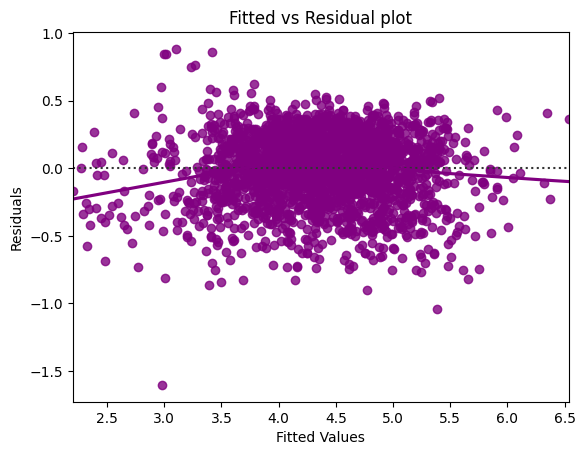

<IPython.core.display.Javascript object>

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

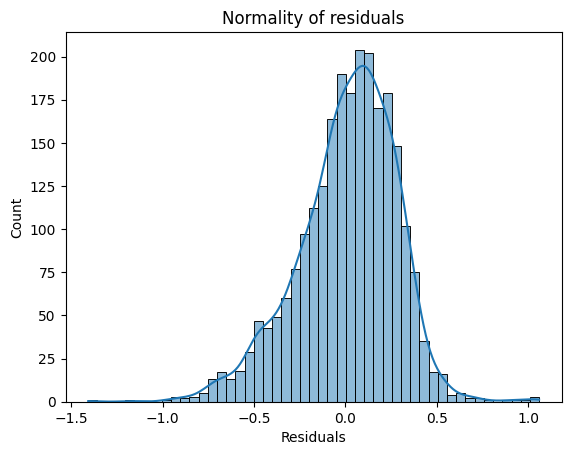

<IPython.core.display.Javascript object>

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True) ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

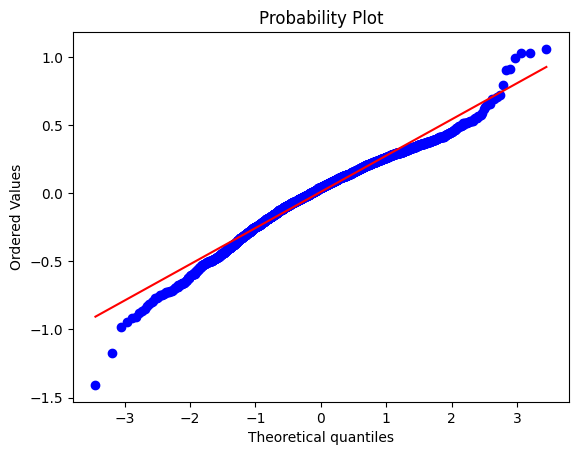

<IPython.core.display.Javascript object>

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

NameError: name 'stats' is not defined

<IPython.core.display.Javascript object>

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

Models are heteroscedastic as p <0.05

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

NameError: name 'df_pred' is not defined

<IPython.core.display.Javascript object>

## Final Model Summary

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train2).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.996
Model:                               OLS   Adj. R-squared (uncentered):              0.996
Method:                    Least Squares   F-statistic:                          1.332e+04
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                           01:14:17   Log-Likelihood:                         -245.00
No. Observations:                   2417   AIC:                                      586.0
Df Residuals:                       2369   BIC:                                      863.9
Df Model:                             48                                                  
Covariance Type:               nonrobust                                                  
                                                                                          

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train2, y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.267784  0.209287   0.789523        0.784894  4.959104

<IPython.core.display.Javascript object>

In [ ]:
y_test
# for next cell
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
y_test = y_test.reset_index()


<IPython.core.display.Javascript object>

In [ ]:
# x_test=x_test.fillna(x_test).median()

<IPython.core.display.Javascript object>

In [ ]:
# predicted_y = olsmodel1.predict(x_test)

<IPython.core.display.Javascript object>

In [ ]:
# skip
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238132  0.184127   0.842778        0.834301  4.476801

<IPython.core.display.Javascript object>

In [ ]:
x_test2.shape

(2417, 89)

<IPython.core.display.Javascript object>

In [ ]:
y_test.shape

(1037,)

<IPython.core.display.Javascript object>

In [114]:
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238132  0.184127   0.842778        0.834301  4.476801

<IPython.core.display.Javascript object>

##  Actionable Insights and Recommendations

- There were errors testing the models on the test data
- The training data gives a Root Mean Squared Error of ~23% which may be satisfactory - to be discussed with stakeholders.
- Since the MAE is also low and comparable (albeit on the training data), the MAPE suggests we should be able to predict within 4.7%


- Since the model is not producing final results for the test data yet, it is not ready for production.
- The current error is to do with the dimensions of the variables not matching up
- The next action for this data set is to try to retrace through the code to see if there are errors in the variable names.
- data appears to be heteroscedastic as p < 0.05 so variance not constant
- perhaps if more data cleaning is done the model will be able to be tested

used x_test and y_test with olsmodel1 to test model performance instead

RMSE of 23.8 percent, compares well to MAE 18 percent
MAPE predicts within 4.47%

---------

Appendix: opriginal try featuringh duplicate removal with non working test model:

<a href="https://colab.research.google.com/github/Coder731/machine-learning-project/blob/main/SLF_Project_LearnerNotebook_LowCode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext nb_black

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
from string import Template
import pprint

data = pd.read_csv("used_device_data.csv")
print(
    '\n___________________1\n',
    'data.head(2):\n',
    data.head(2),
    '\n___________________2\n',
    'data.shape:\n',
    data.shape,
    '\n___________________3\n',
    'data.info():\n',
    data.info(),
    '\n___________________4\n',
    'data.describe().T:\n',
    data.describe().T)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3

<IPython.core.display.Javascript object>

In [ ]:
data.dropna()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3447      Apple      iOS        15.27  yes   no             8.0   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.0   213.0          2020   
2                  8.0       128.0  8.0   4200.0   213.0          2020   
3                  8.0        64.0  6.0   7250.0   480.0          2020   
4                  8.0        64.0  3.0   5000.0   185.0          2020   
...                ...         ...  ...      ...     ...           ...   
3447               7.0        64.0  4.0   3110.0   194.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127               4.307572              4.715100  
1           325               5.162097              5.519018  
2           162               5.111084              5.884631  
3           345               5.135387              5.630961  
4           293               4.389995              4.947837  
...         ...                    ...                   ...  
3447        208               5.100902              6.287933  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994  

[3253 rows x 15 columns]

<IPython.core.display.Javascript object>

### Duplicates

In [ ]:
# duplicates
headings_list=list(data.columns.values)
countT=0
countF=0
a=0
holder={}
string_holder=' : '
holder_duplicates_counted={}

# then run for loop:
for head_n, heading in enumerate(headings_list):
  hold_key=heading
  strg_var='\"{}\"'.format(heading)
  hold_value=headings_list[head_n] # hold_value=list[#]
  col_el_1=data[headings_list[head_n]].head(1).to_string(index=False) # col_hold=df[list[#]]
  # hold_value_3=headings_list['{}'.format(strg_var)] # hold_value_3=headings_list["heading"]
  # print("col_el_1:",col_el_1)
   # put strg_var between square brackets
  current_col_headg_in_brakts_n_quotes='[{}]'.format(strg_var)
  print("current_col_headg_in_brakts_n_quotes:",current_col_headg_in_brakts_n_quotes)
  data_col_i=data[Template("$obj").substitute(obj=heading)].head(2).to_string(index=False)
  # print("data_col_i (first 2 row(cell)values in col):")
  # print(data_col_i)
  print("data[",Template("$heading").substitute(heading=heading),"].unique():\n",data[heading].unique(),sep="")
  print("")

  # pre variable(s):
  outer_key=heading
  # assemble dictionary within dictionary (depth of 2 at least):
  Template("$outer_key").substitute(outer_key=outer_key)
  # heading1 : value_is_inner_dictionary
  # inner_dictionary is:
  # key : value
  
  # if head_n==1:
  #   break

current_col_headg_in_brakts_n_quotes: ["brand_name"]
data[brand_name].unique():
['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']

current_col_headg_in_brakts_n_quotes: ["os"]
data[os].unique():
['Android' 'Others' 'iOS' 'Windows']

current_col_headg_in_brakts_n_quotes: ["screen_size"]
data[screen_size].unique():
[14.5  17.3  16.69 25.5  15.32 16.23 13.84 15.77 15.47 15.9  16.74 25.43
 20.32 15.29 12.88 15.24 15.37 16.71 25.6  15.34 16.59 16.81 20.42 10.16
 17.78 17.32 15.39 12.7  15.44  5.28 15.27 15.8  15.72 12.83  7.62  7.75
 10.03 15.42 16.56  5.18 16.64 16.94 16.33 10.29 16.43 12.93 16.36 16.66
 16.21 17.5  16.13 16.28 14.4  15.21 20.12 16.89 16.48 16.31 25.53 12.73
 20.55 30.71 27.94 25.45 18.01 14.35 16.15 23.04 10.34 10.24 12.78 

<IPython.core.display.Javascript object>

TODO:
get duplicated values list for each column
=)
if duplicated = True 
- for each value
- in a column
- for first value only
update dict / append to list
of duplicates
duplicates = []
or
duplicates={key_is_entry_which_is_duplicated:value_is_incrementing_count_of_duplicated_entry}
CURRENT
Replicate first key :value .update()

In [ ]:
# begin assembling holder dictionary for heading key and True/False value:
# holder={ heading : data[heading].duplicated() }
# holder.append() # only works on list use update for dictionary:
# holder.update({"heading": "data[heading].duplicated()"})
duplicate_boolean=data[heading].duplicated().to_string(index=False)
holder.update({Template("$heading").substitute(heading=heading): Template("$duplicate_boolean").substitute(duplicate_boolean=duplicate_boolean)})
# holder={}
# print(holder)
pprint.pprint(holder)


{'normalized_new_price': 'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                         'False\n'
                    

<IPython.core.display.Javascript object>

In [ ]:
holder_duplicates_counted={}
outer_key=heading
Template("$outer_key").substitute(outer_key=outer_key)

'normalized_new_price'

<IPython.core.display.Javascript object>

In [ ]:
data[heading].duplicated().head(4).to_string(index=False)

'False\nFalse\nFalse\nFalse'

<IPython.core.display.Javascript object>

Check for duplicates for single iteration of 1st for loop - DONE

TODO
1
insert second for loop 
into 
first for loop

2
amalgamate
code cells
used in 
making
2nd for loop
into
single block of code
to be incorporated
into first for loop

In [ ]:
current_count_dict={}
for val_count, value in enumerate(data[heading].duplicated()) :
    # print(value)
    if value == True:
        current_count_dict.update({Template("$val_count").substitute(val_count=val_count) : Template("$value").substitute(value=value)})
# print(current_count_dict)
print(len(current_count_dict))
print(len(data[heading].duplicated()))

466
3454


<IPython.core.display.Javascript object>

In [ ]:
len(data[heading].duplicated()) - len(current_count_dict)

2988

<IPython.core.display.Javascript object>

In [ ]:
data[heading].unique()

array([4.71510025, 5.51901794, 5.88463072, ..., 6.25153773, 4.62418819,
       4.27999391])

<IPython.core.display.Javascript object>

In [ ]:
len(data[heading].unique())

2988

<IPython.core.display.Javascript object>

In [ ]:
# difference between number of duplicated values in column and number of values shown as True equals the number of unique values in the column
# That is, once duplicates are removed, only unique values remain (by definition) 
len(data[heading].duplicated()) - len(current_count_dict)==len(data[heading].unique())

True

<IPython.core.display.Javascript object>

In [ ]:
# https://pythonprinciples.com/ask/how-do-you-create-a-variable-number-of-variables/
my_vars = {}
for i in range(10):
    var_name = "var%d" % i
    my_vars[var_name] = i

print(my_vars["var2"])
print(my_vars)

2
{'var0': 0, 'var1': 1, 'var2': 2, 'var3': 3, 'var4': 4, 'var5': 5, 'var6': 6, 'var7': 7, 'var8': 8, 'var9': 9}


<IPython.core.display.Javascript object>

In [ ]:
data[heading].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451     True
3452    False
3453    False
Name: normalized_new_price, Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [ ]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

duplicates final answer:

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [ ]:
duplicates_list=data.duplicated()

<IPython.core.display.Javascript object>

as recount_True is 0, there are duplicates in the data dataset

now go one level deeper with duplicate check:

In [ ]:
# how many?

<IPython.core.display.Javascript object>

In [ ]:
recount_True=0
for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
    if (duplicate_boolean_recount==True):
        recount_True+=1


<IPython.core.display.Javascript object>

In [ ]:
print(recount_True)

0


<IPython.core.display.Javascript object>

In [ ]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

15 columns in data set

just do first heading instance first:

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==0):
        print('heading ', count_3, ' is ', heading_count_3, sep='')
    if (count_3==0):
        break

heading 0 is brand_name


<IPython.core.display.Javascript object>

for brand_name: implement the following code block:

In [ ]:
# heading_1 = brand_name
# make it def function :
def heading_1():
    duplicates_list=data['brand_name'].duplicated()

    recount_True=0
    for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
        if (duplicate_boolean_recount==True):
            recount_True+=1

    print(recount_True)
    print(duplicates_list)
    print(len(duplicates_list))
heading_1()

3420
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: brand_name, Length: 3454, dtype: bool
3454


<IPython.core.display.Javascript object>

In [ ]:
'''
 do a check 
 to see if 3420 is actually the number of duplicates.
 also check length of the data set

 - DONE
'''

'\n do a check \n to see if 3420 is actually the number of duplicates.\n also check length of the data set\n\n - DONE\n'

<IPython.core.display.Javascript object>

In [ ]:
# copy def (not call) of function heading_1
# use next function for headings 2 through 15:

def heading_2_to_15(heading):
    duplicates_list=data[heading].duplicated()

    recount_True=0
    for duplicate_index_recount, duplicate_boolean_recount in enumerate(duplicates_list):
        if (duplicate_boolean_recount==True):
            recount_True+=1

    print('recount_True:',recount_True)
    print('duplicates_list:')
    print(duplicates_list)
    print('duplicates_list:',len(duplicates_list))


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==1):
        print('heading modified count ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==1):
        break

heading modified count 2 is os


<IPython.core.display.Javascript object>

In [ ]:
# call function 
heading_2_to_15('os') # (heading 2 is os)

recount_True: 3450
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: os, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==2):
        print('heading modified count ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==2):
        break

heading modified count 3 is screen_size


<IPython.core.display.Javascript object>

In [ ]:
heading_2_to_15('screen_size') # (heading 3 is screen_size)

recount_True: 3312
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: screen_size, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==3):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==3):
        break

heading 4 is 4g


<IPython.core.display.Javascript object>

In [ ]:
heading_2_to_15('4g') # (heading 4 is 4g)

recount_True: 3452
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: 4g, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==4):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==4):
        break

heading 5 is 5g


<IPython.core.display.Javascript object>

In [ ]:
heading_2_to_15('5g') # (heading 5 is 5g)

recount_True: 3452
duplicates_list:
0       False
1       False
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: 5g, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==5):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==5):
        break
heading_2_to_15(heading_count_3) # (heading 6 is main_camera_mp)

heading 6 is main_camera_mp
recount_True: 3412
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: main_camera_mp, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==6):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==6):
        break
heading_2_to_15(heading_count_3) # (heading 7 is selfie_camera_mp)

heading 7 is selfie_camera_mp
recount_True: 3416
duplicates_list:
0       False
1       False
2       False
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: selfie_camera_mp, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==7):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==7):
        break
heading_2_to_15(heading_count_3)

heading 8 is int_memory
recount_True: 3438
duplicates_list:
0       False
1       False
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: int_memory, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==8):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==8):
        break
heading_2_to_15(heading_count_3)

heading 9 is ram
recount_True: 3441
duplicates_list:
0       False
1       False
2        True
3       False
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: ram, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==9):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==9):
        break
heading_2_to_15(heading_count_3)

heading 10 is battery
recount_True: 3129
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: battery, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==10):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==10):
        break
heading_2_to_15(heading_count_3)

heading 11 is weight
recount_True: 2898
duplicates_list:
0       False
1       False
2        True
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: weight, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==11):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==11):
        break
heading_2_to_15(heading_count_3)

heading 12 is release_year
recount_True: 3446
duplicates_list:
0       False
1        True
2        True
3        True
4        True
        ...  
3449     True
3450     True
3451     True
3452     True
3453     True
Name: release_year, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==12):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==12):
        break
heading_2_to_15(heading_count_3)

heading 13 is days_used
recount_True: 2530
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450     True
3451     True
3452    False
3453     True
Name: days_used, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==13):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==13):
        break
heading_2_to_15(heading_count_3)

heading 14 is normalized_used_price
recount_True: 360
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453     True
Name: normalized_used_price, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

In [ ]:
for count_3, heading_count_3 in enumerate(headings_list):
    if (count_3==14):
        print('heading ', count_3 + 1, ' is ', heading_count_3, sep='')

    if (count_3==14):
        break
heading_2_to_15(heading_count_3)

heading 15 is normalized_new_price
recount_True: 466
duplicates_list:
0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451     True
3452    False
3453    False
Name: normalized_new_price, Length: 3454, dtype: bool
duplicates_list: 3454


<IPython.core.display.Javascript object>

checkpoint for 15 heading _ s run - DONE

In [ ]:
# len(duplicates_list)

<IPython.core.display.Javascript object>

In [ ]:
# if len(duplicates_list)==countF:
#   print("all values are False")

<IPython.core.display.Javascript object>

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [ ]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


<IPython.core.display.Javascript object>

In [ ]:
# df = data.copy()

<IPython.core.display.Javascript object>

### Checking for missing values

In [ ]:
data.duplicated() ## Complete the code to check duplicate entries in the data

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

<IPython.core.display.Javascript object>

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Graphs

**`normalized_used_price`**

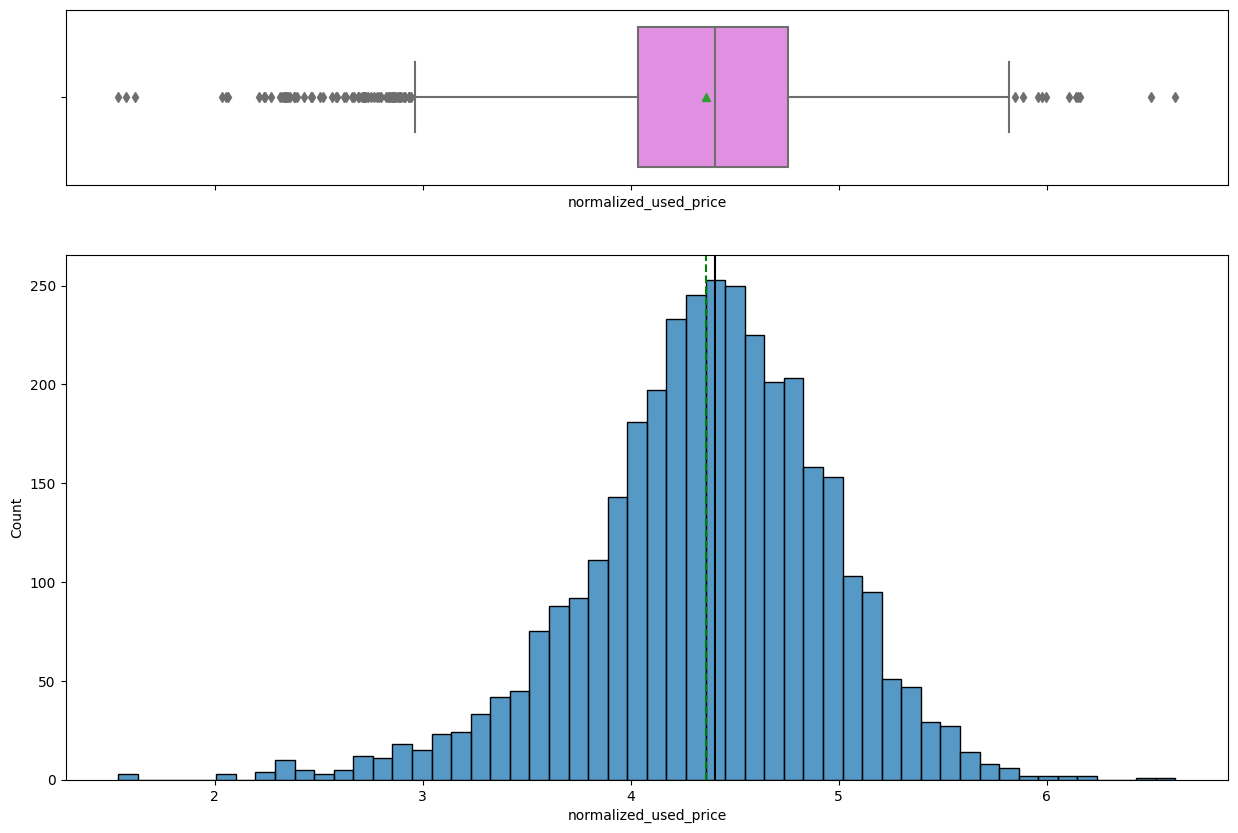

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "normalized_used_price")

**`normalized_new_price`**

checkpoint 2 27Jan2022 0122 h

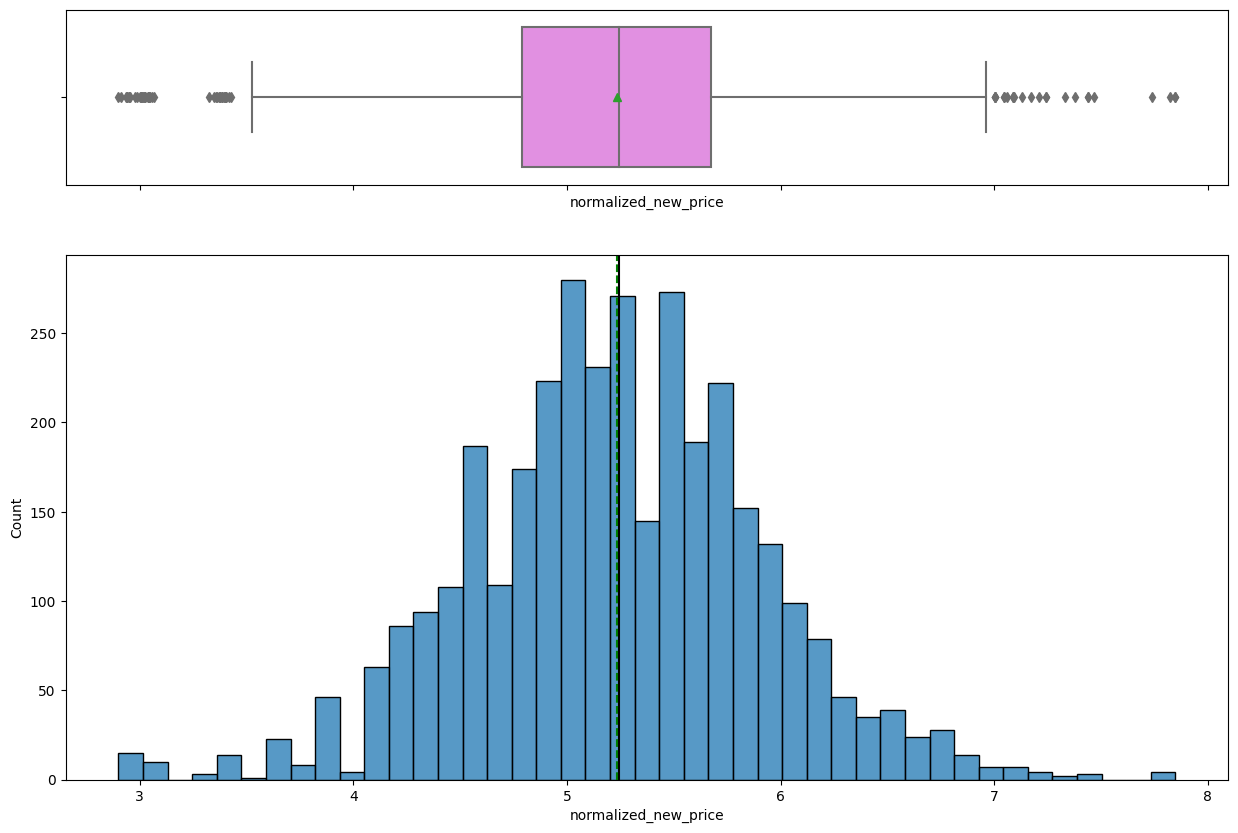

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'normalized_new_price')  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**`screen_size`**

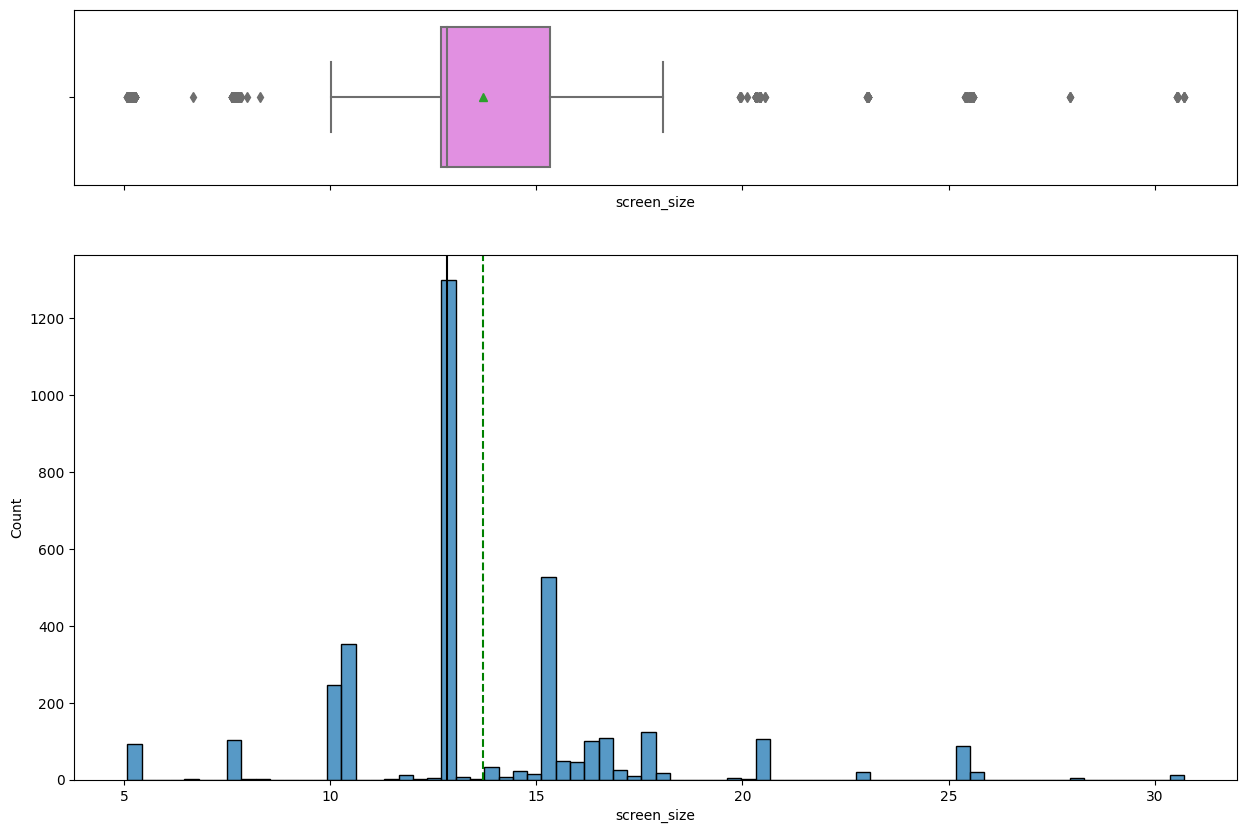

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'screen_size')  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

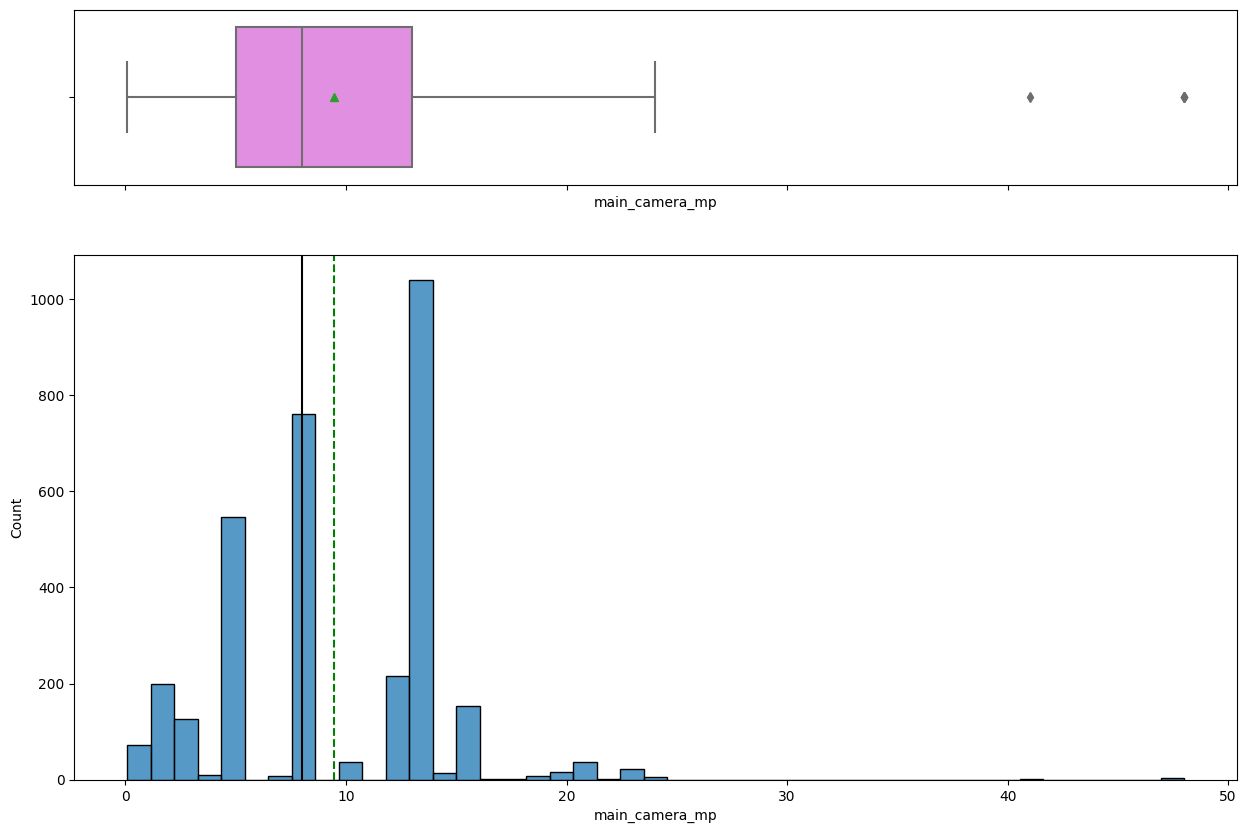

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'main_camera_mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

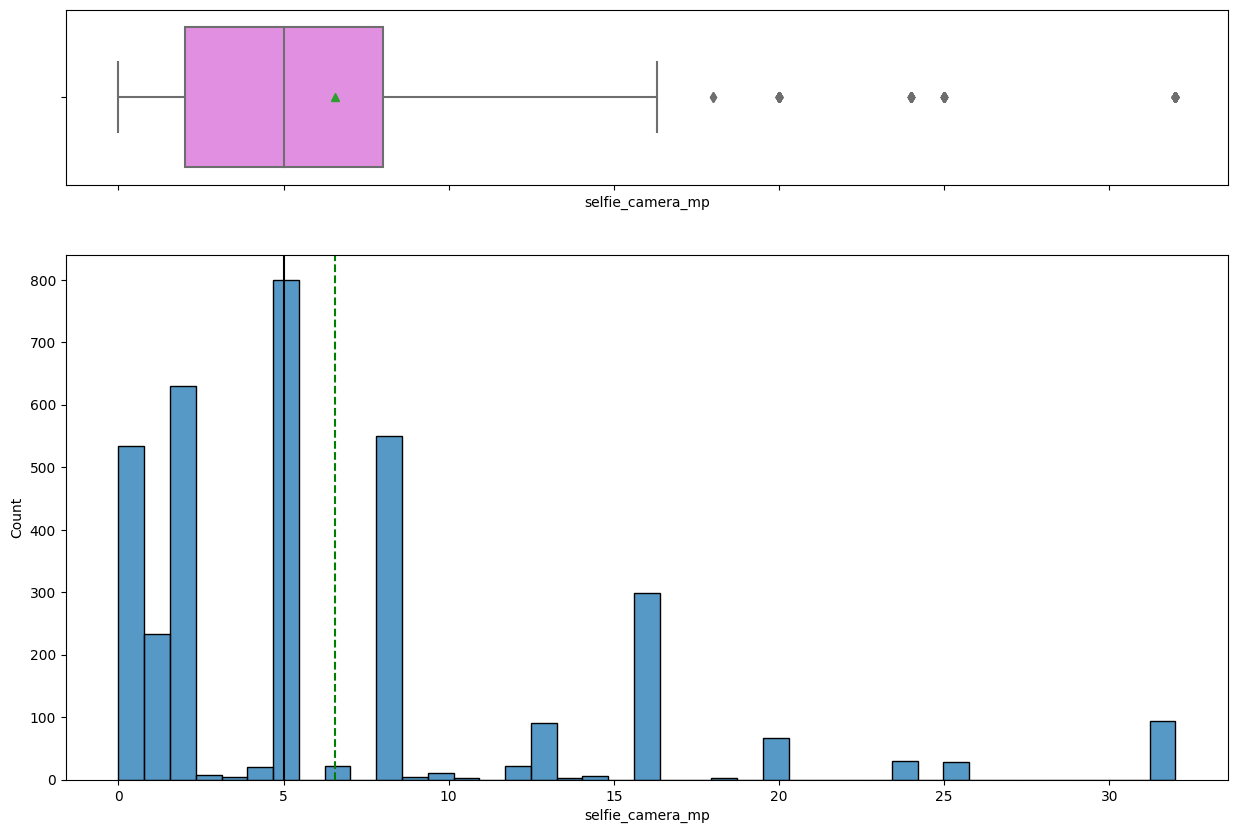

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'selfie_camera_mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

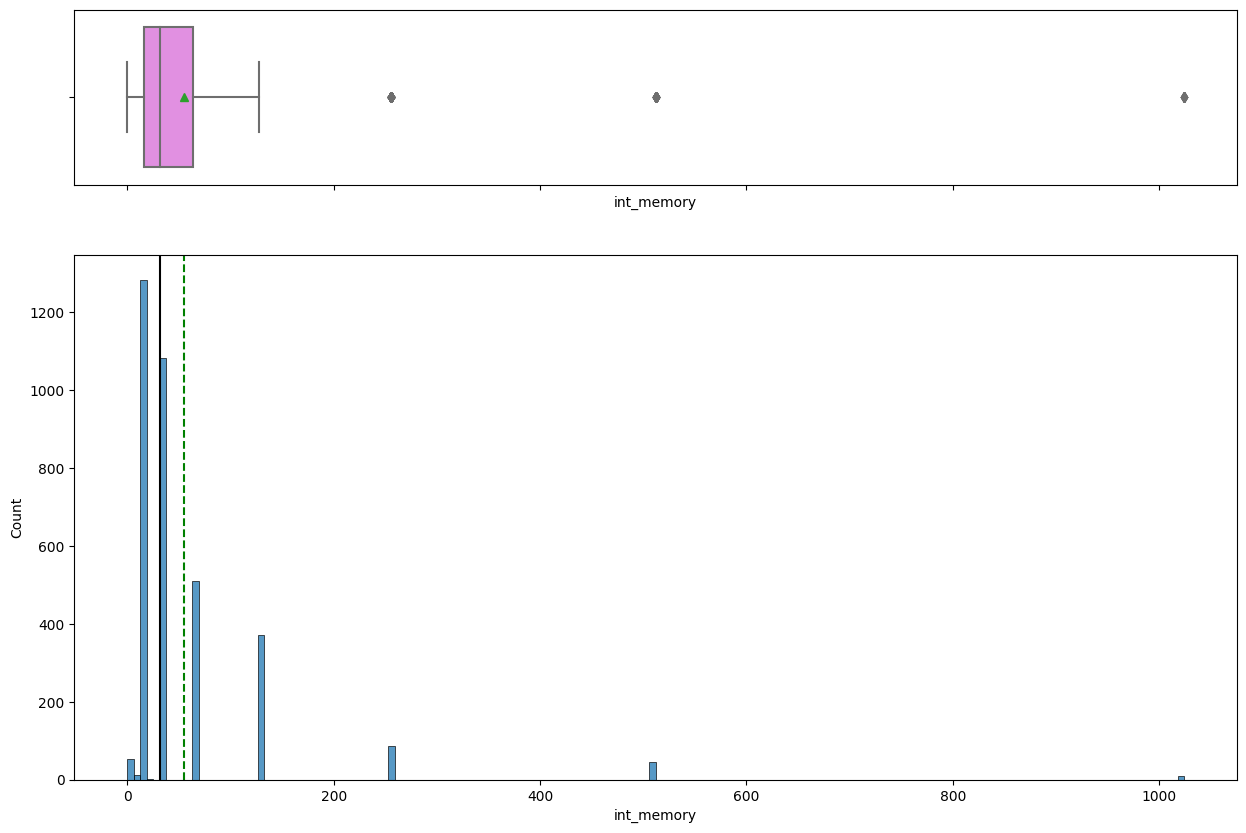

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'int_memory')  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

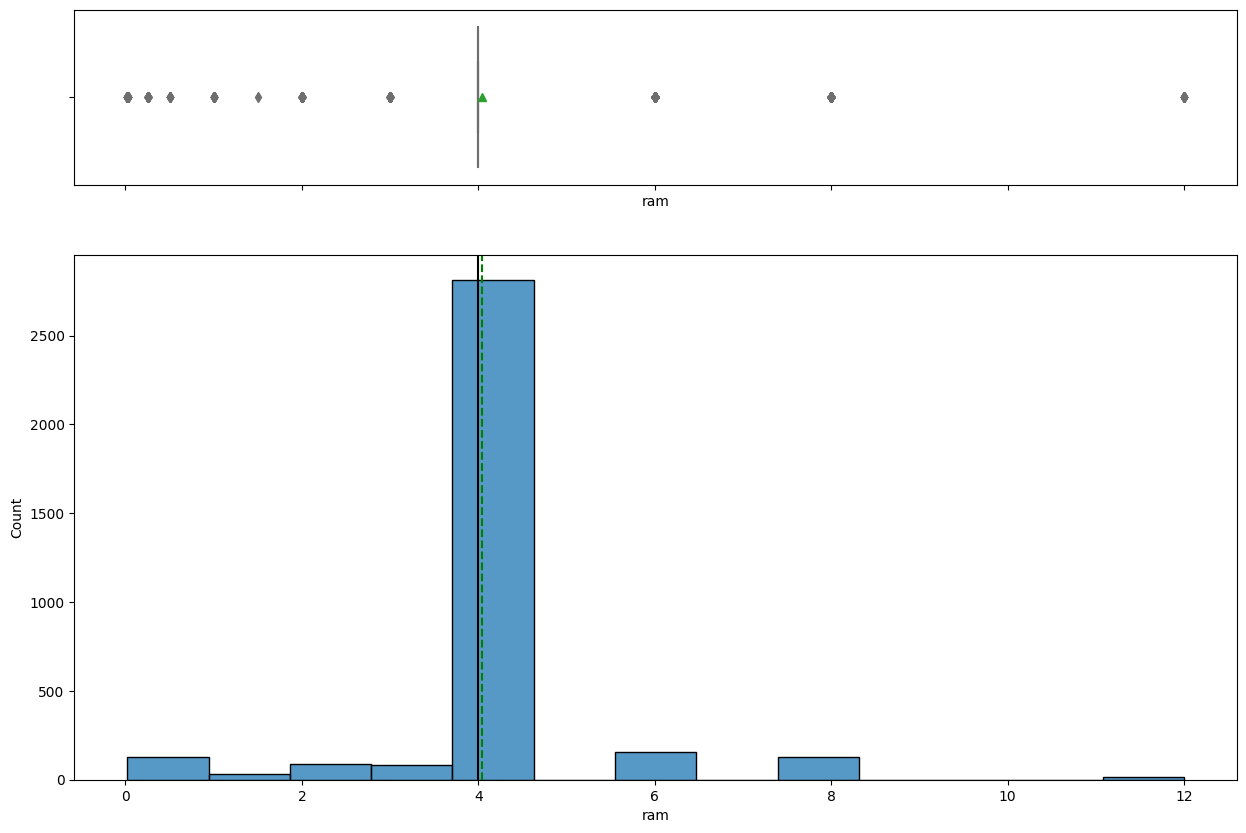

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'ram')  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

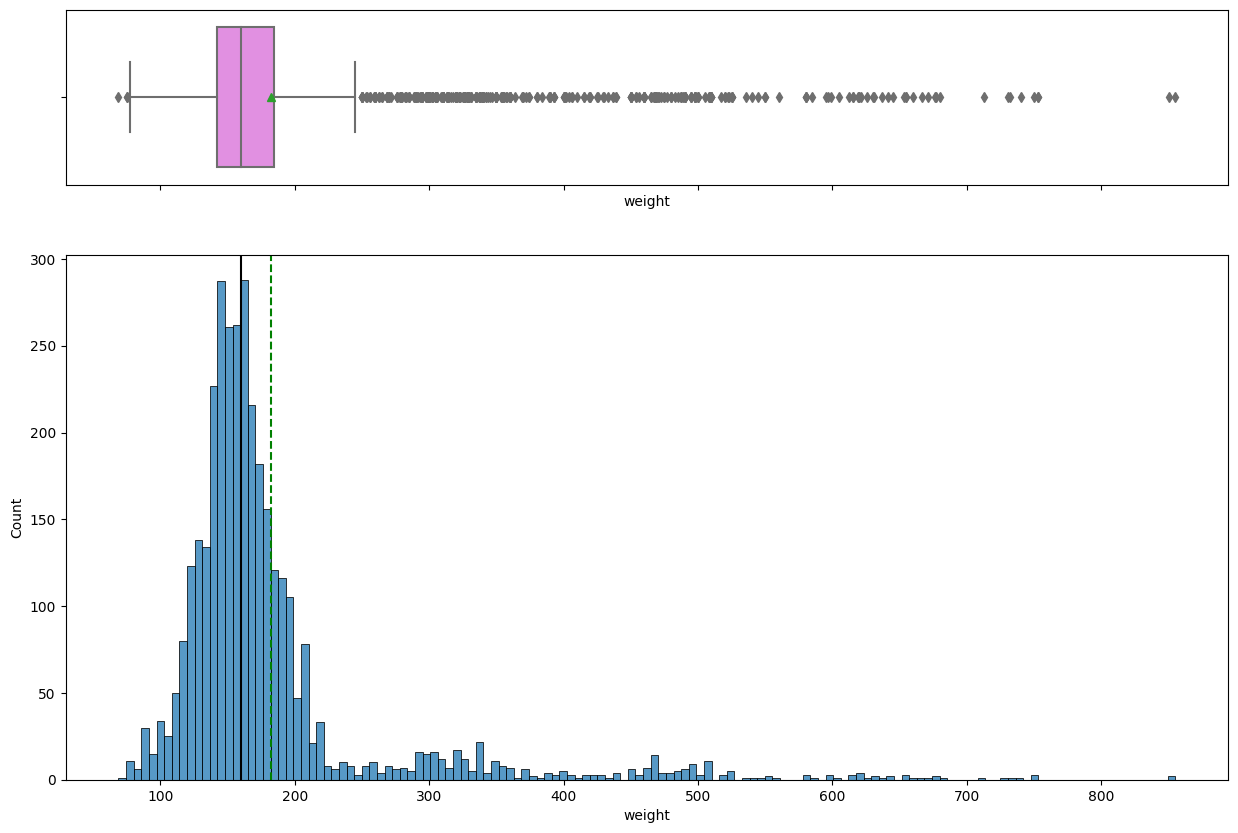

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'weight')  ## Complete the code to create histogram_boxplot for 'weight'

**`battery`**

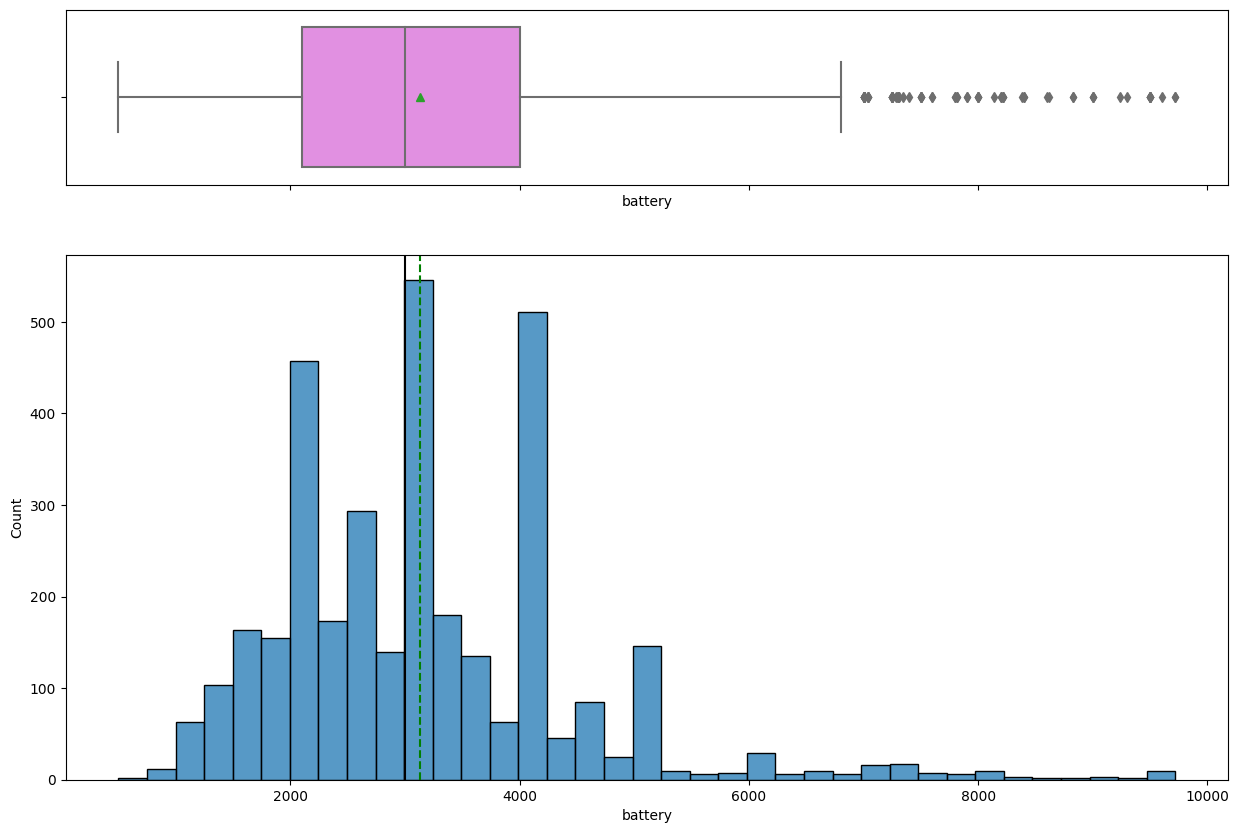

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'battery')  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

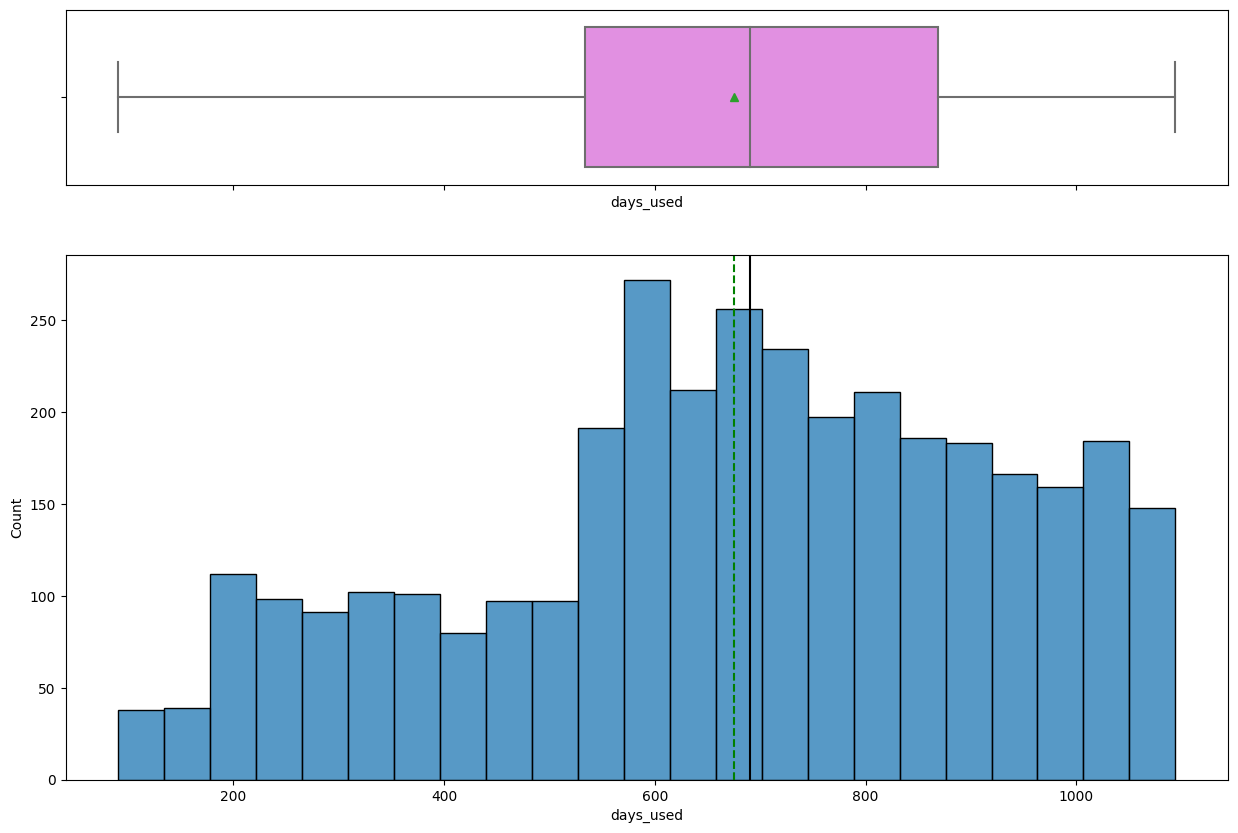

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, 'days_used')  ## Complete the code to create histogram_boxplot for 'days_used'

**`brand_name`**

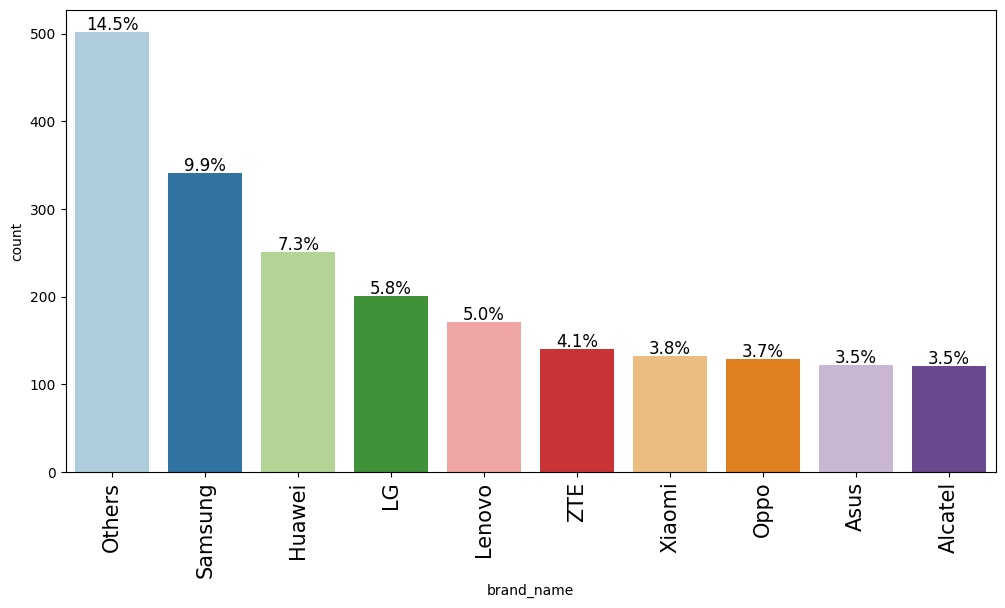

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

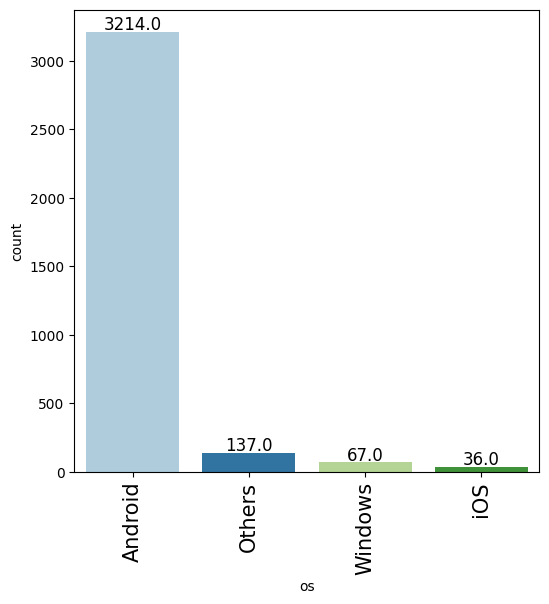

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, 'os') ## Complete the code to create labeled_barplot for 'os'

**`4g`**

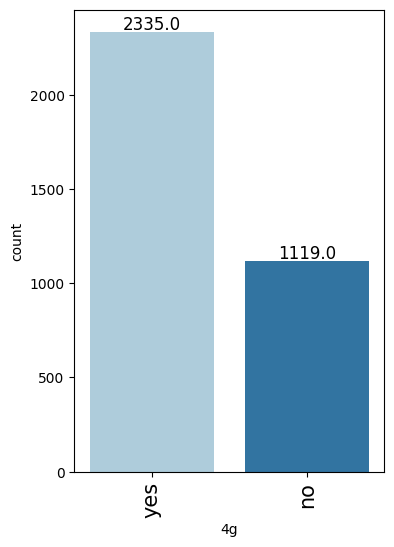

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, '4g') ## Complete the code to create labeled_barplot for '4g'

**`5g`**

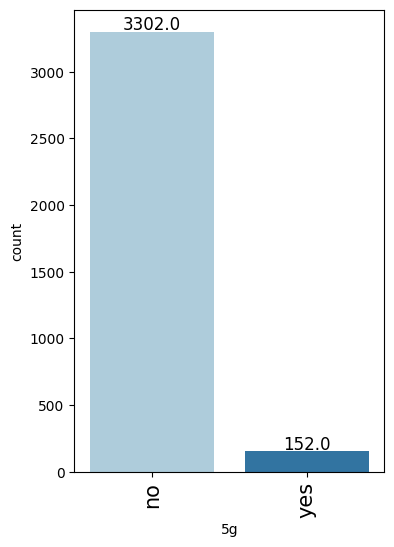

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df,'5g') ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

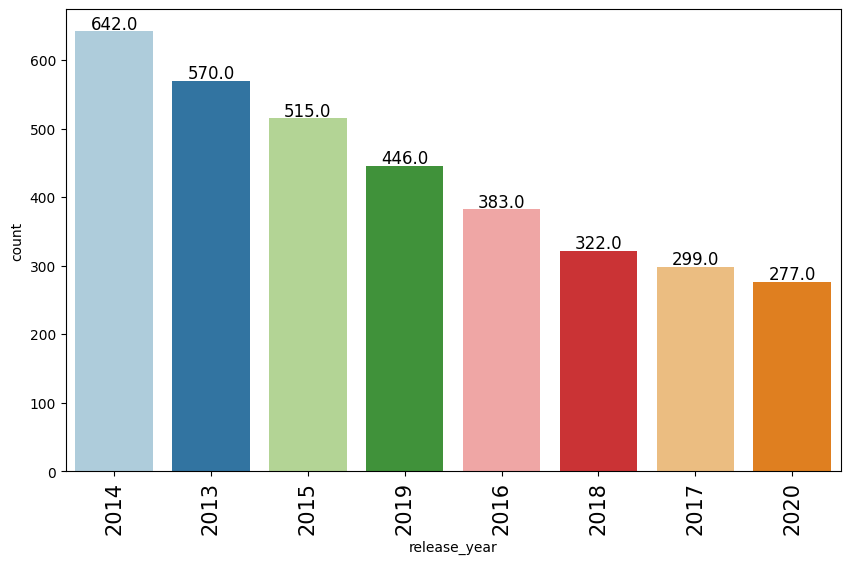

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, 'release_year') ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

**Correlation Check**

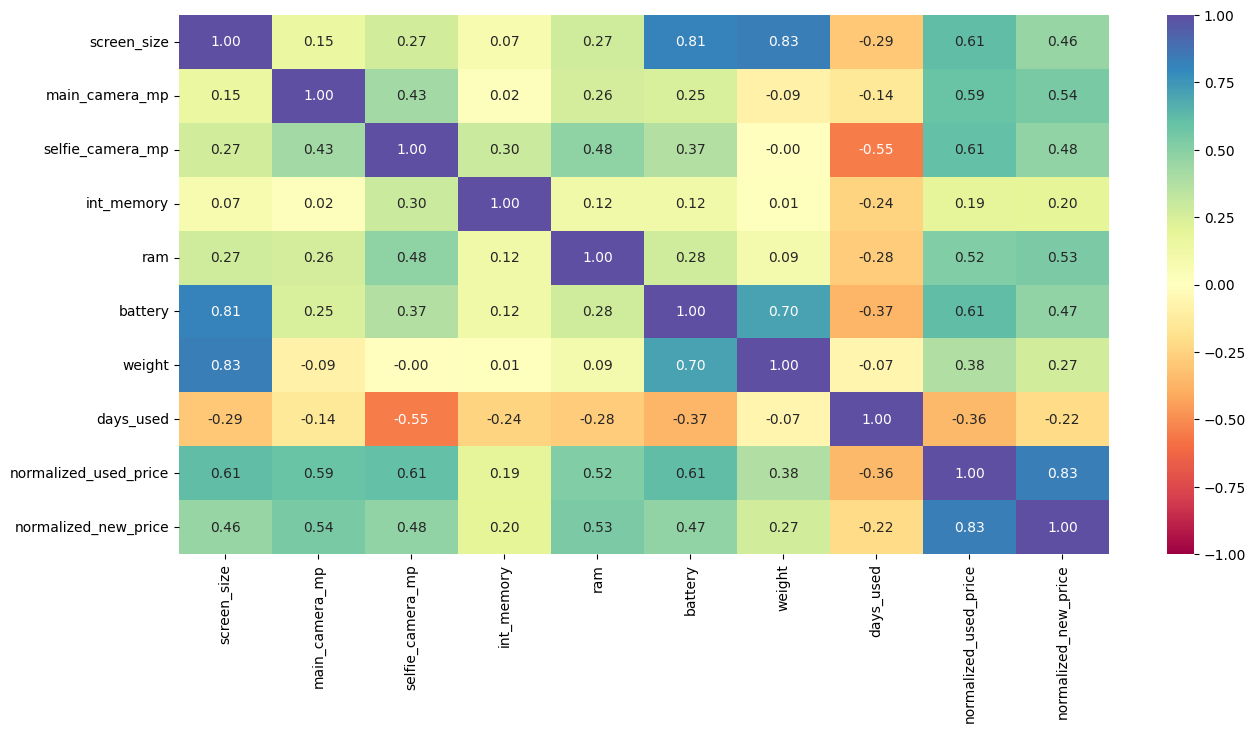

<IPython.core.display.Javascript object>

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

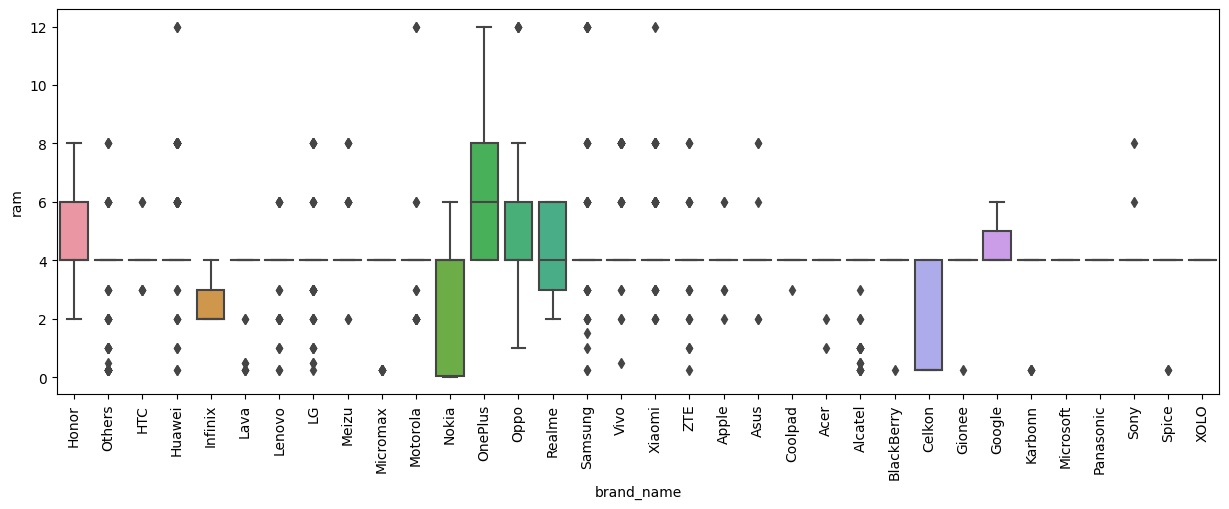

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

<IPython.core.display.Javascript object>

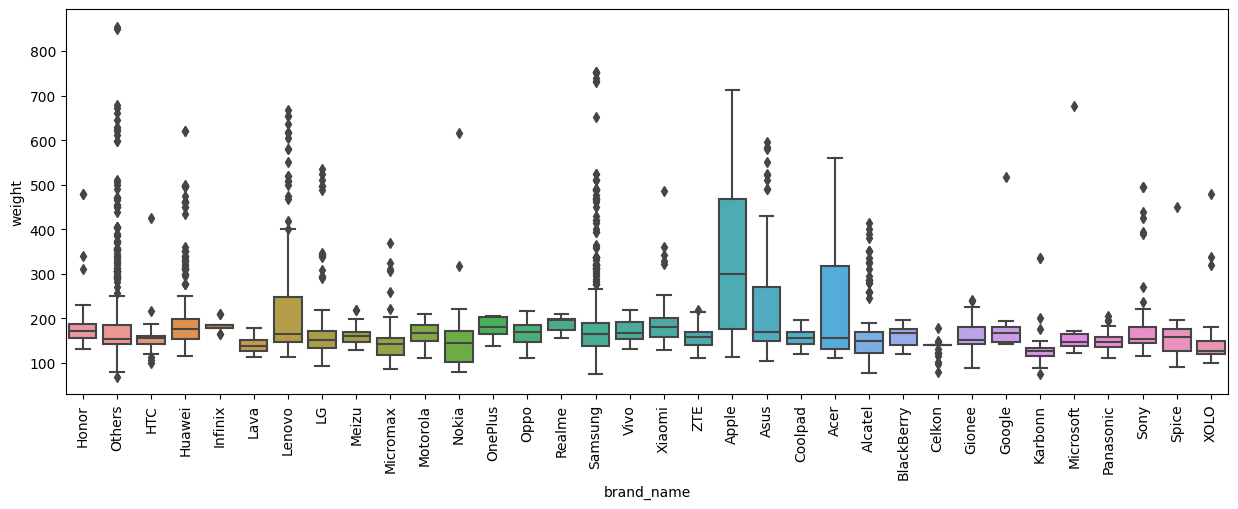

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='brand_name', y='weight', data=df) ## Complete the code to create a boxplot for 'brand_name' and 'weight' # https://builtin.com/data-science/boxplot
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

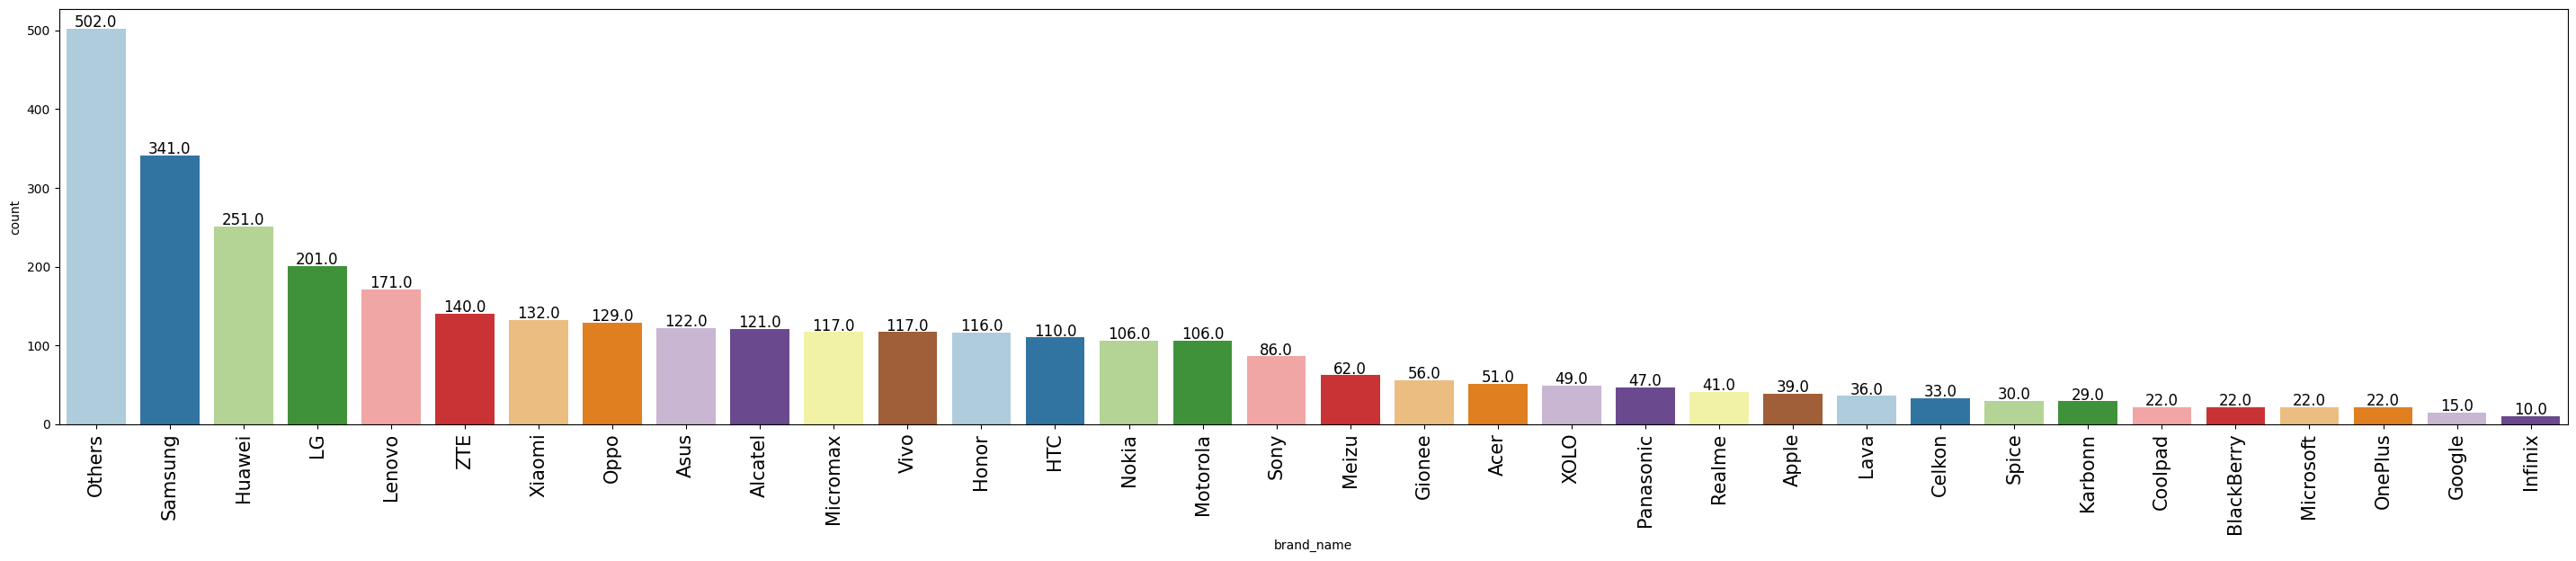

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

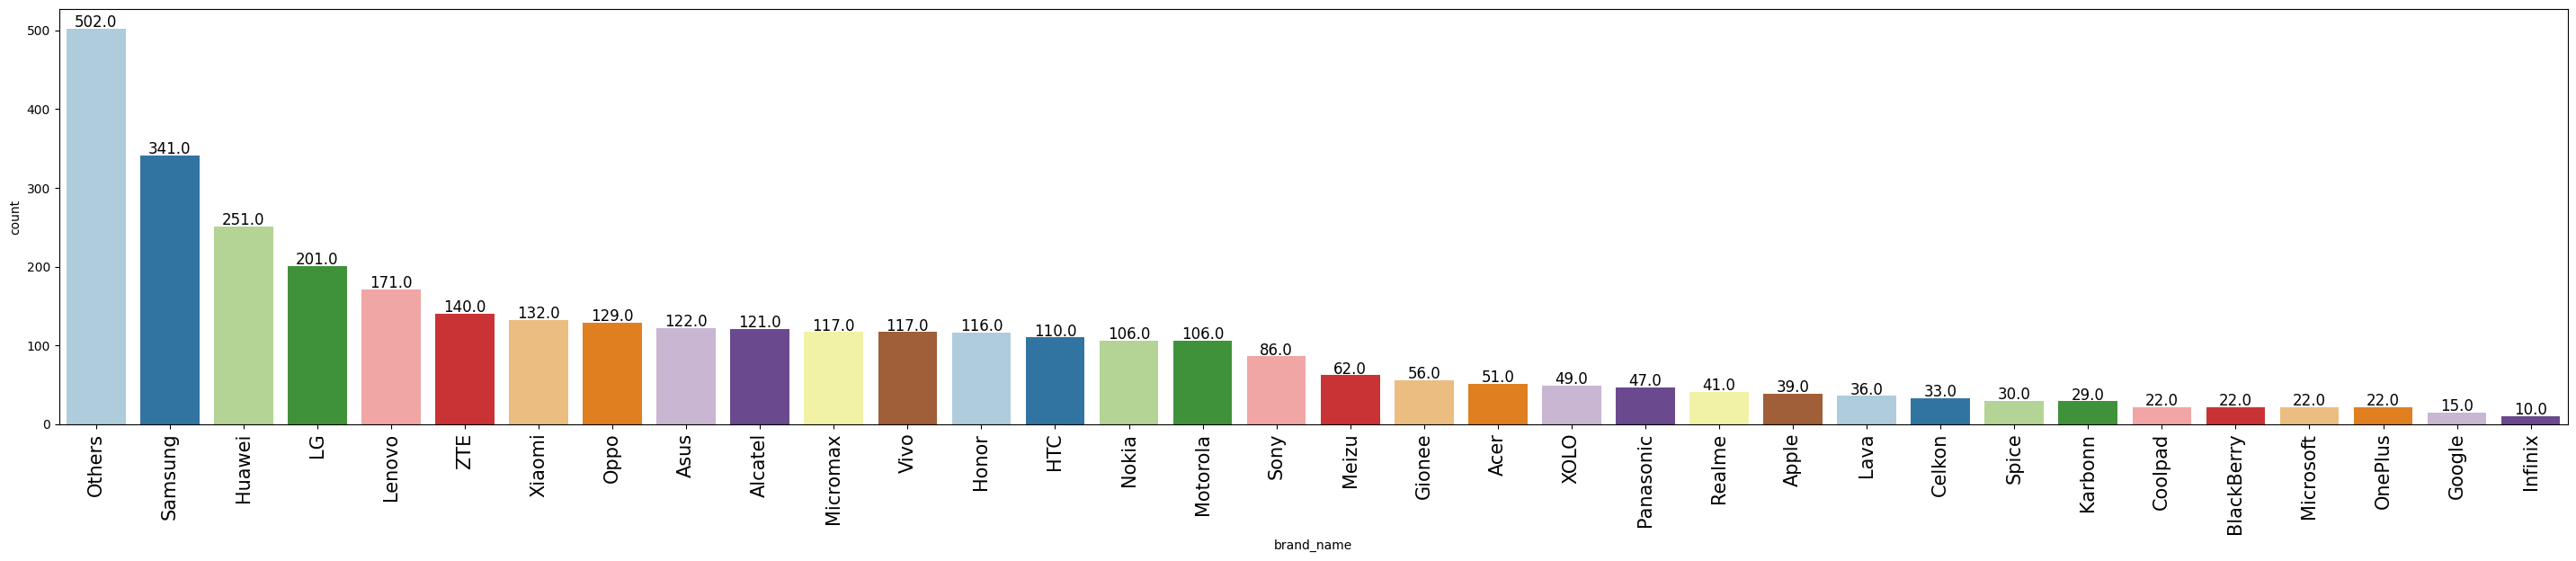

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

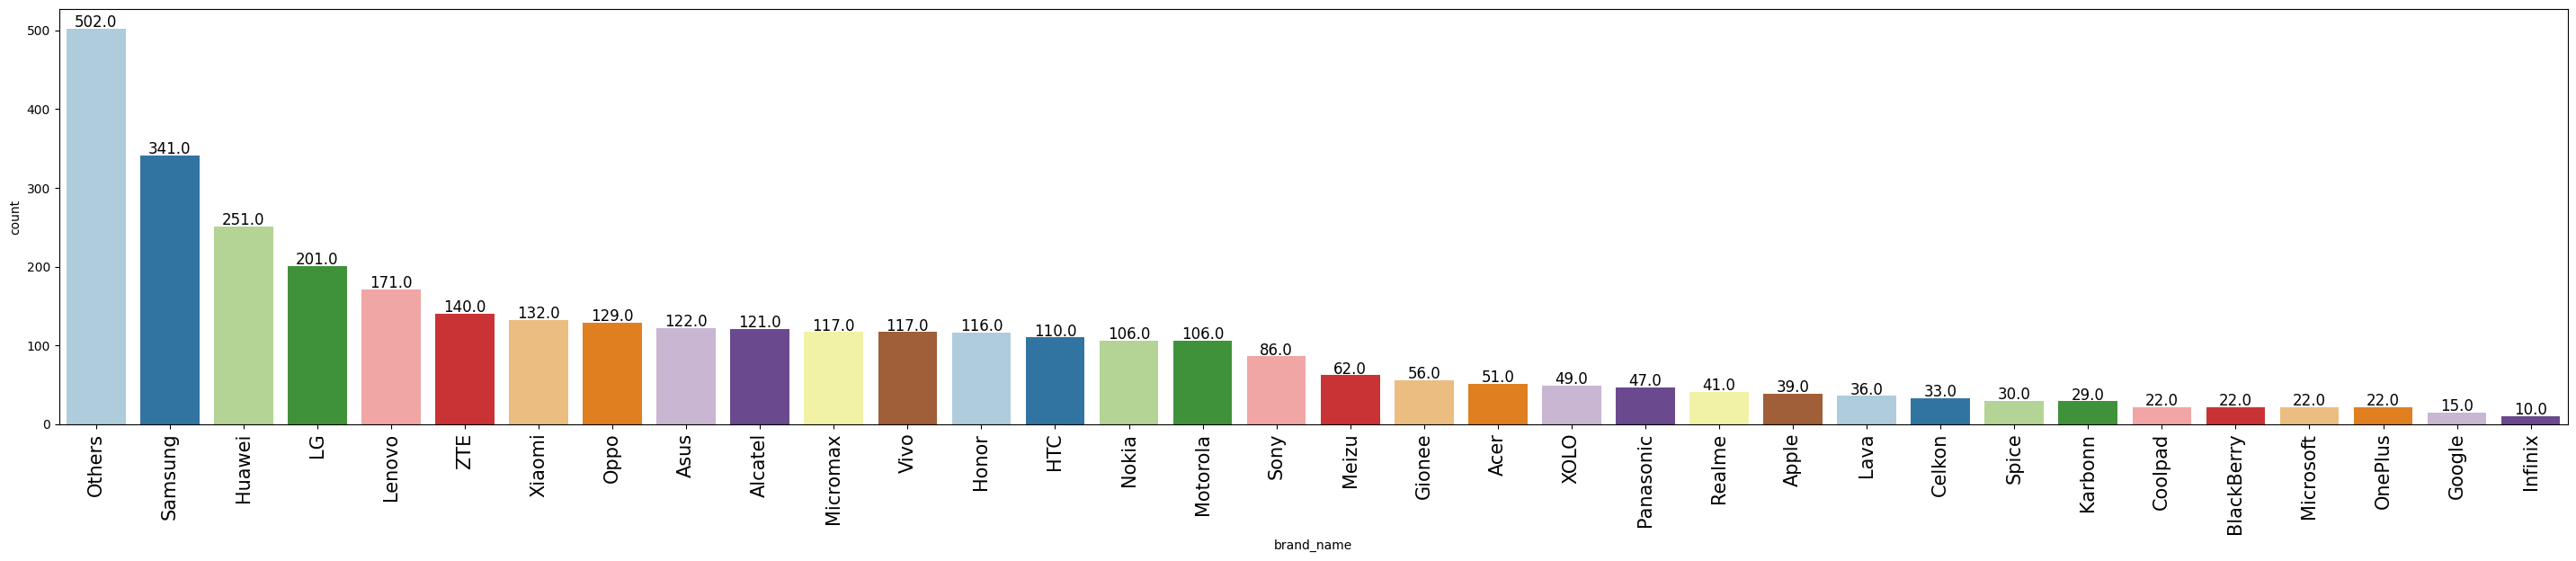

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df,'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

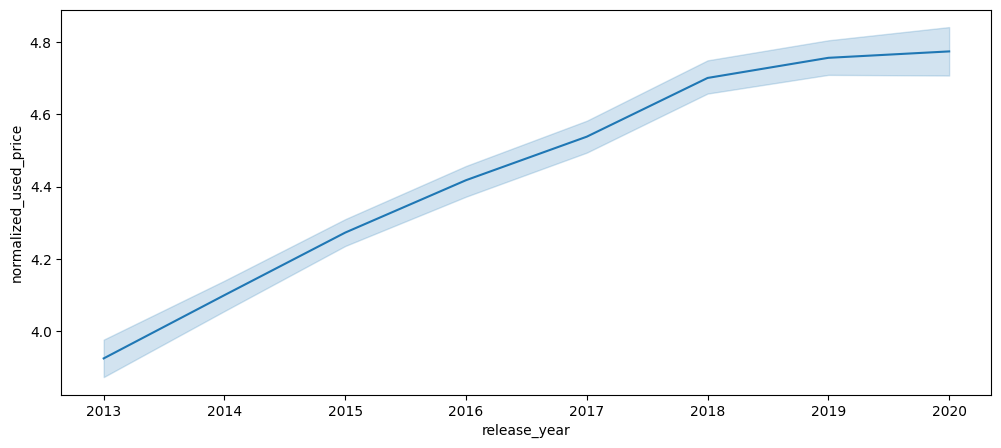

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price") ## Complete the code to create a lineplot for release year and used price # release_year normalized_used_price # https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

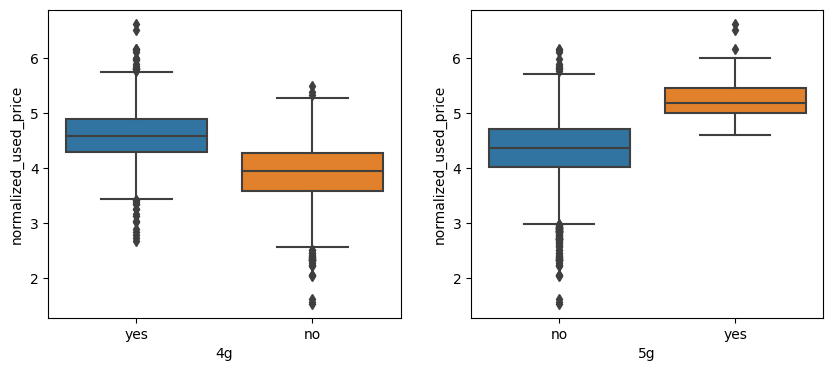

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
df1.isnull()

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False            True   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

In [ ]:
# checking for missing values
df1.isna() ## Complete the code to check missing values in all the columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False            True   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["main_camera_mp"].transform("median")
)


<IPython.core.display.Javascript object>

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median") # https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False           False   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False           False   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median) ## Complete the code to impute the data with median

# checking for missing values
df1.isna() ## Complete the code to check missing values after imputing the above columns

brand_name     os  screen_size     4g     5g  main_camera_mp  \
0          False  False        False  False  False           False   
1          False  False        False  False  False           False   
2          False  False        False  False  False           False   
3          False  False        False  False  False           False   
4          False  False        False  False  False           False   
...          ...    ...          ...    ...    ...             ...   
3449       False  False        False  False  False           False   
3450       False  False        False  False  False           False   
3451       False  False        False  False  False           False   
3452       False  False        False  False  False           False   
3453       False  False        False  False  False           False   

      selfie_camera_mp  int_memory    ram  battery  weight  release_year  \
0                False       False  False    False   False         False   
1                False       False  False    False   False         False   
2                False       False  False    False   False         False   
3                False       False  False    False   False         False   
4                False       False  False    False   False         False   
...                ...         ...    ...      ...     ...           ...   
3449             False       False  False    False   False         False   
3450             False       False  False    False   False         False   
3451             False       False  False    False   False         False   
3452             False       False  False    False   False         False   
3453             False       False  False    False   False         False   

      days_used  normalized_used_price  normalized_new_price  
0         False                  False                 False  
1         False                  False                 False  
2         False                  False                 False  
3         False                  False                 False  
4         False                  False                 False  
...         ...                    ...                   ...  
3449      False                  False                 False  
3450      False                  False                 False  
3451      False                  False                 False  
3452      False                  False                 False  
3453      False                  False                 False  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

In [ ]:
df1_isna=df1.isna()

<IPython.core.display.Javascript object>

In [ ]:
isna_True_holder=[]
isna_True_count=0
for isna_index,boolean_isna in enumerate(df1_isna['main_camera_mp']):
    if (boolean_isna==True):
        isna_True_holder.append(boolean_isna)
        isna_True_count+=isna_True_count
print(isna_True_holder)
print(isna_True_count)

[]
0


<IPython.core.display.Javascript object>

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()
df1.head()

brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_used_price  \
0        64.0  3.0   3020.0   146.0        127               4.307572   
1       128.0  8.0   4300.0   213.0        325               5.162097   
2       128.0  8.0   4200.0   213.0        162               5.111084   
3        64.0  6.0   7250.0   480.0        345               5.135387   
4        64.0  3.0   5000.0   185.0        293               4.389995   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.630961                    1  
4              4.947837                    1

<IPython.core.display.Javascript object>

### Outlier Check



- Let's check for outliers in the data.

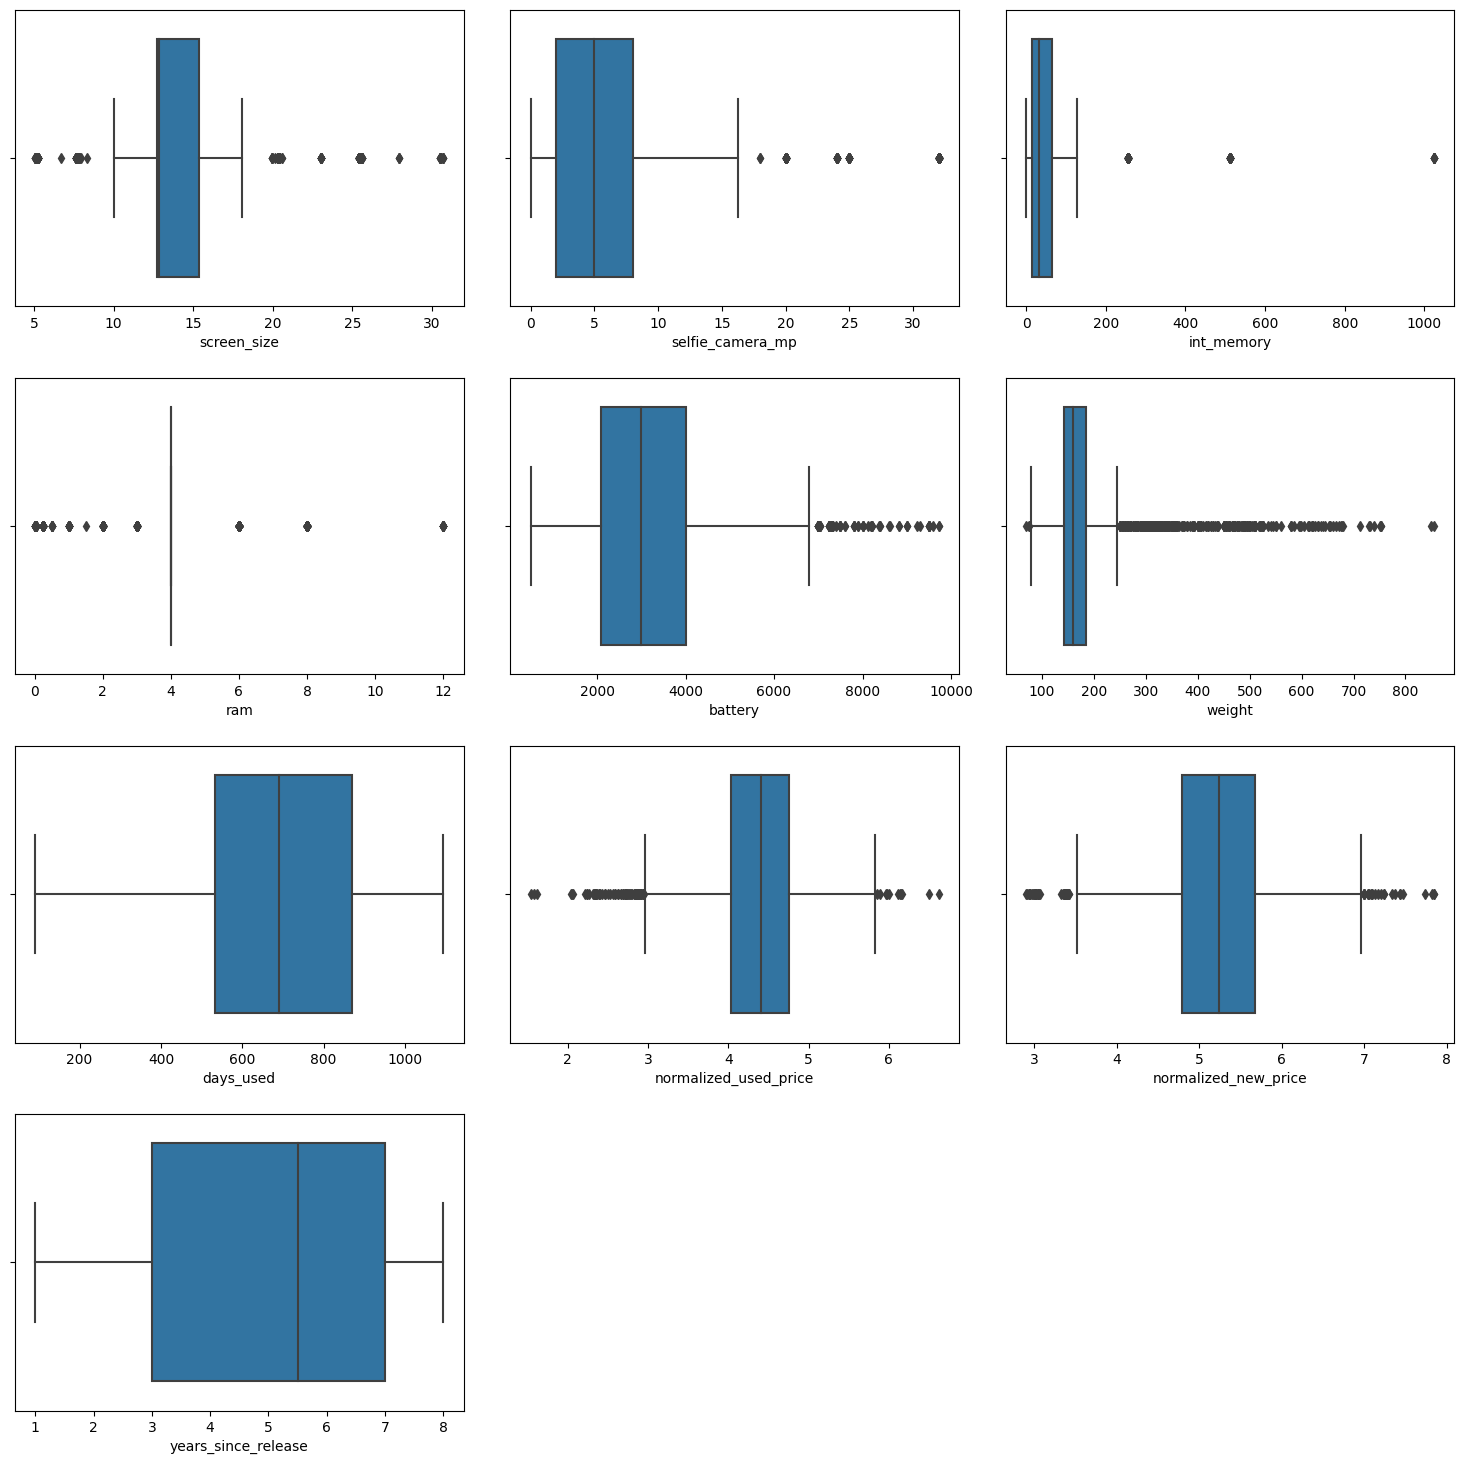

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
df1.head()

brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_used_price  \
0        64.0  3.0   3020.0   146.0        127               4.307572   
1       128.0  8.0   4300.0   213.0        325               5.162097   
2       128.0  8.0   4200.0   213.0        162               5.111084   
3        64.0  6.0   7250.0   480.0        345               5.135387   
4        64.0  3.0   5000.0   185.0        293               4.389995   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.630961                    1  
4              4.947837                    1

<IPython.core.display.Javascript object>

In [ ]:
df1.drop(["brand_name", "os"], axis=1, inplace=True)
df1.head()

screen_size   4g   5g main_camera_mp  selfie_camera_mp  int_memory  ram  \
0        14.50  yes   no           13.0               5.0        64.0  3.0   
1        17.30  yes  yes           13.0              16.0       128.0  8.0   
2        16.69  yes  yes           13.0               8.0       128.0  8.0   
3        25.50  yes  yes           13.0               8.0        64.0  6.0   
4        15.32  yes   no           13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_used_price  normalized_new_price  \
0   3020.0   146.0        127               4.307572              4.715100   
1   4300.0   213.0        325               5.162097              5.519018   
2   4200.0   213.0        162               5.111084              5.884631   
3   7250.0   480.0        345               5.135387              5.630961   
4   5000.0   185.0        293               4.389995              4.947837   

   years_since_release  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

<IPython.core.display.Javascript object>

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
## Complete the code to define the dependent and independent variables
X = df1.drop("normalized_used_price", axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

   screen_size   4g   5g main_camera_mp  selfie_camera_mp  int_memory  ram  \
0        14.50  yes   no           13.0               5.0        64.0  3.0   
1        17.30  yes  yes           13.0              16.0       128.0  8.0   
2        16.69  yes  yes           13.0               8.0       128.0  8.0   
3        25.50  yes  yes           13.0               8.0        64.0  6.0   
4        15.32  yes   no           13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  years_since_release  
0   3020.0   146.0        127              4.715100                    1  
1   4300.0   213.0        325              5.519018                    1  
2   4200.0   213.0        162              5.884631                    1  
3   7250.0   480.0        345              5.630961                    1  
4   5000.0   185.0        293              4.947837                    1  

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: norm

<IPython.core.display.Javascript object>

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

const  screen_size  selfie_camera_mp  int_memory  ram  battery  weight  \
0    1.0        14.50               5.0        64.0  3.0   3020.0   146.0   
1    1.0        17.30              16.0       128.0  8.0   4300.0   213.0   
2    1.0        16.69               8.0       128.0  8.0   4200.0   213.0   
3    1.0        25.50               8.0        64.0  6.0   7250.0   480.0   
4    1.0        15.32               8.0        64.0  3.0   5000.0   185.0   

   days_used  normalized_new_price  years_since_release  ...  \
0        127              4.715100                    1  ...   
1        325              5.519018                    1  ...   
2        162              5.884631                    1  ...   
3        345              5.630961                    1  ...   
4        293              4.947837                    1  ...   

   main_camera_mp_20.1  main_camera_mp_12.6  main_camera_mp_16.3  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   main_camera_mp_22.6  main_camera_mp_19.0  main_camera_mp_21.5  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   main_camera_mp_21.2  main_camera_mp_8.1  main_camera_mp_1.2  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   main_camera_mp_22.5  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 53 columns]

<IPython.core.display.Javascript object>

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

<IPython.core.display.Javascript object>

note y not Y

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression


In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     273.1
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                           00:51:45   Log-Likelihood:                 140.32
No. Observations:                   2417   AIC:                            -182.6
Df Residuals:                       2368   BIC:                             101.1
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

<IPython.core.display.Javascript object>

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.228323  0.178955   0.846986        0.843554  4.288941

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238132  0.184127   0.842778        0.834301  4.476801

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [ ]:
# checking_vif(x_train_iteration_2)  ## Complete the code to check VIF on train data

<IPython.core.display.Javascript object>

In [ ]:
# custom
checking_vif(x_train)  ## Complete the code to check VIF on train data

c:\Users\steph\OneDrive\Documents\37-ML-wk3-project\container\machine-learning-project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


feature         VIF
0                                               const  161.249542
1                                         screen_size    6.809726
2                                    selfie_camera_mp    2.642841
3                                          int_memory    1.330881
4                                                 ram    2.137841
5                                             battery    4.050169
6                                              weight    6.388104
7                                           days_used    2.656972
8                                normalized_new_price    2.863411
9                                 years_since_release    4.967171
10                                             4g_yes    2.354993
11                                             5g_yes    1.821181
12                                 main_camera_mp_8.0    1.551033
13                                 main_camera_mp_5.0    1.931182
14                                main_camera_mp_10.5    1.094999
15                                main_camera_mp_3.15    1.426119
16  main_camera_mp_<bound method NDFrame._add_nume...    1.034635
17                                 main_camera_mp_2.0    1.601185
18                                main_camera_mp_16.0    1.130219
19                                 main_camera_mp_0.3    1.434772
20                                main_camera_mp_12.0    1.165456
21                                main_camera_mp_14.5    1.015958
22                                main_camera_mp_48.0    1.013260
23                                 main_camera_mp_3.0    1.019486
24                                main_camera_mp_21.0    1.021659
25                                 main_camera_mp_1.3    1.256193
26                                main_camera_mp_13.1    1.010437
27                                main_camera_mp_24.0    1.006402
28                                main_camera_mp_0.08    1.016779
29                                main_camera_mp_20.7    1.020921
30                                main_camera_mp_23.0    1.016434
31                                 main_camera_mp_1.0         NaN
32                                main_camera_mp_18.0    1.002410
33                                main_camera_mp_12.2    1.024722
34                                main_camera_mp_12.3    1.011324
35                                main_camera_mp_20.0    1.011560
36                                main_camera_mp_20.2    1.003500
37                                 main_camera_mp_4.0    1.015969
38                                main_camera_mp_12.5    1.016295
39                                main_camera_mp_10.0    1.018014
40                                 main_camera_mp_6.5    1.002874
41                                 main_camera_mp_6.7    1.022505
42                                main_camera_mp_41.0         NaN
43                                main_camera_mp_20.1         NaN
44                                main_camera_mp_12.6         NaN
45                                main_camera_mp_16.3    1.014998
46                                main_camera_mp_22.6    1.006720
47                                main_camera_mp_19.0    1.022772
48                                main_camera_mp_21.5    1.006563
49                                main_camera_mp_21.2    1.006577
50                                 main_camera_mp_8.1    1.028498
51                                 main_camera_mp_1.2    1.040011
52                                main_camera_mp_22.5    1.002241

<IPython.core.display.Javascript object>

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [ ]:
col_list = ['const'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  const                           0.996233                 0.270483

<IPython.core.display.Javascript object>

In [ ]:
col_to_drop = 'const' ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_train.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif.head(3)

c:\Users\steph\OneDrive\Documents\37-ML-wk3-project\container\machine-learning-project\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF after dropping  const


feature        VIF
0       screen_size  82.879421
1  selfie_camera_mp   4.930478
2        int_memory   1.914259

<IPython.core.display.Javascript object>

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# x_train2_a=x_train2.fillna(df1["main_camera_mp"].median)
# x_test2_a=x_test2.fillna(df1["main_camera_mp"].median)

<IPython.core.display.Javascript object>

In [ ]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'selfie_camera_mp', 'ram', 'weight', 'days_used', 'normalized_new_price', '4g_yes', '5g_yes', 'main_camera_mp_<bound method NDFrame._add_numeric_operations.<locals>.median of 0       13.0\n1       13.0\n2       13.0\n3       13.0\n4       13.0\n        ... \n3449    13.0\n3450    13.0\n3451    13.0\n3452    13.0\n3453    13.0\nName: main_camera_mp, Length: 3454, dtype: float64>', 'main_camera_mp_2.0', 'main_camera_mp_0.3', 'main_camera_mp_23.0', 'main_camera_mp_4.0', 'main_camera_mp_16.3', 'main_camera_mp_8.1']


<IPython.core.display.Javascript object>

In [ ]:
x_train3 = x_train2[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = x_test2[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

<IPython.core.display.Javascript object>

In [ ]:
olsmodel2 = sm.OLS(y_train, x_train3).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.996
Model:                               OLS   Adj. R-squared (uncentered):              0.996
Method:                    Least Squares   F-statistic:                          4.272e+04
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                           00:51:49   Log-Likelihood:                         -258.63
No. Observations:                   2417   AIC:                                      547.3
Df Residuals:                       2402   BIC:                                      634.1
Df Model:                             15                                                  
Covariance Type:               nonrobust                                                  
                                                                                          

<IPython.core.display.Javascript object>

In [ ]:
x_train3.shape

(2417, 15)

<IPython.core.display.Javascript object>

In [ ]:
x_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 3026 to 1061
Data columns (total 15 columns):
 #   Column                                                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                              --------------  -----  
 0   screen_size                                                                                                                                                                                                                                                                        

<IPython.core.display.Javascript object>

In [ ]:
y_train.shape

(2417,)

<IPython.core.display.Javascript object>

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2417 entries, 3026 to 1061
Series name: normalized_used_price
Non-Null Count  Dtype  
--------------  -----  
2417 non-null   float64
dtypes: float64(1)
memory usage: 37.8 KB


<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.269299  0.210603   0.787136        0.785806  4.988034

<IPython.core.display.Javascript object>

In [ ]:
# skip
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



ValueError: Found input variables with inconsistent numbers of samples: [1037, 2417]

<IPython.core.display.Javascript object>

ValueError: Found input variables with inconsistent numbers of samples: [1037, 2417]

https://insideaiml.com/questions/ValueError:-Found-input-variables-with-inconsistent-numbers-of-samples:-%5B143,-426%5D-86

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.782181   0.305307
1525       4.448399       4.538659  -0.090260
1128       4.315353       4.166286   0.149066
3003       4.282068       4.338837  -0.056769
2907       4.456438       4.338648   0.117791

<IPython.core.display.Javascript object>

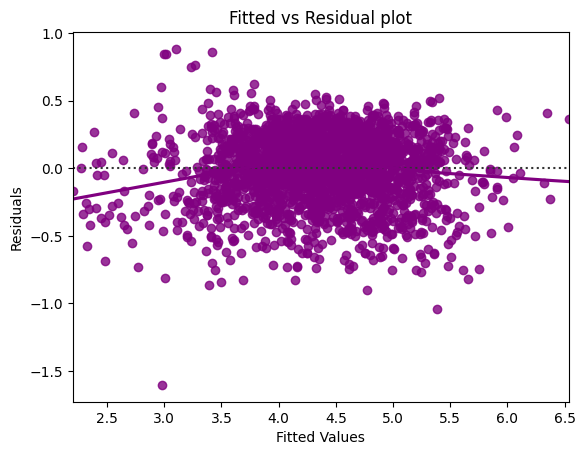

<IPython.core.display.Javascript object>

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

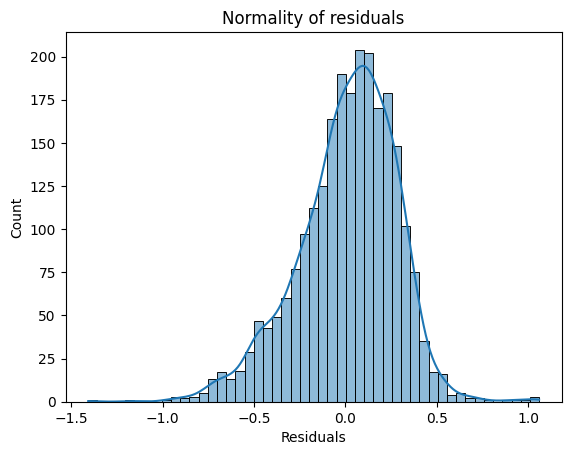

<IPython.core.display.Javascript object>

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True) ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

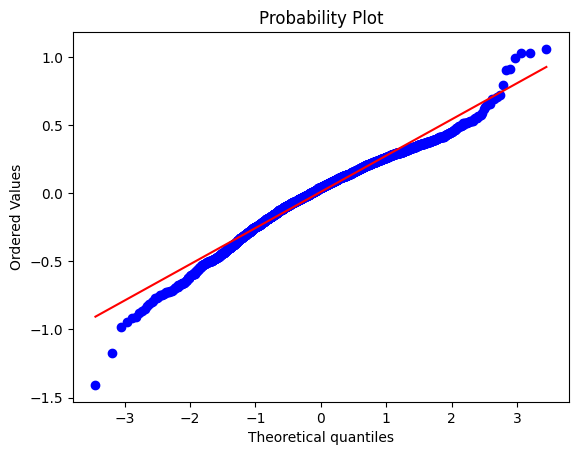

<IPython.core.display.Javascript object>

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9774764776229858, pvalue=4.2037499675703862e-19)

<IPython.core.display.Javascript object>

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

Models are heteroscedastic as p <0.05

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0470234361695416), ('p-value', 0.21367697154560383)]

<IPython.core.display.Javascript object>

## Final Model Summary

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train2).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.996
Model:                               OLS   Adj. R-squared (uncentered):              0.996
Method:                    Least Squares   F-statistic:                          1.332e+04
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                           00:49:24   Log-Likelihood:                         -245.00
No. Observations:                   2417   AIC:                                      586.0
Df Residuals:                       2369   BIC:                                      863.9
Df Model:                             48                                                  
Covariance Type:               nonrobust                                                  
                                                                                          

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train2, y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.267784  0.209287   0.789523        0.784894  4.959104

<IPython.core.display.Javascript object>

In [ ]:
y_test
# for next cell
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
y_test = y_test.reset_index()


<IPython.core.display.Javascript object>

In [ ]:
# x_test=x_test.fillna(x_test).median()

<IPython.core.display.Javascript object>

In [ ]:
# predicted_y = olsmodel1.predict(x_test)

<IPython.core.display.Javascript object>

In [ ]:
# skip
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



ValueError: y_true and y_pred have different number of output (2!=1)

<IPython.core.display.Javascript object>

In [ ]:
x_test2.shape

(2417, 89)

<IPython.core.display.Javascript object>

In [ ]:
y_test.shape

(1037,)

<IPython.core.display.Javascript object>

##  Actionable Insights and Recommendations

- There were errors testing the models on the test data
- The training data gives a Root Mean Squared Error of ~23% which may be satisfactory - to be discussed with stakeholders.
- Since the MAE is also low and comparable (albeit on the training data), the MAPE suggests we should be able to predict within 4.7%


- Since the model is not producing final results for the test data yet, it is not ready for production.
- The current error is to do with the dimensions of the variables not matching up
- The next action for this data set is to try to retrace through the code to see if there are errors in the variable names.
- data appears to be heteroscedastic as p < 0.05 so variance not constant
- perhaps if more data cleaning is done the model will be able to be tested

---------